In [1]:
import pandas as pd

In [62]:
listings_2020 = pd.read_csv('../../../../1. Inputs/Listings Data/2020/Listings_price_from_2020/listings.csv')

C:\Users\ggeor\AppData\Local\Temp\ipykernel_29868\3370590613.py:1: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_2020 = pd.read_csv('../../../../1. Inputs/Listings Data/2020/Listings_price_from_2020/listings.csv')


In [63]:
# subset to include only rows with room_type = Entire home/apt
entire_home = listings_2020[listings_2020['room_type'] == 'Entire home/apt']

In [64]:
print(entire_home.shape)

(47445, 106)


In [7]:
# the unique dtypes of the columns in dataset_1
print(entire_home.dtypes.unique())

# print the columns for each dtype
for dtype in entire_home.dtypes.unique():
    print(entire_home.select_dtypes(include=[dtype]).columns)

[dtype('int64') dtype('O') dtype('float64')]
Index(['id', 'accommodates', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm'],
      dtype='object')
Index(['name', 'description', 'neighborhood_overview', 'host_response_time',
       'host_response_rate', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'amenities', 'price', 'instant_bookable'],
      dtype='object')
Index(['host_listings_count', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'beds', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [65]:
# keep only the columns from entire_home (id, name, description, neighbourhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,calculated_host_listings_count_entire_homes,neighbourhood_cleansed,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm, review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month)
columns_to_keep = ['id', 'name', 'description', 'neighborhood_overview', 'host_response_time', 'host_response_rate', 'host_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']

entire_home = entire_home[columns_to_keep]

In [66]:
# load average_price_by_listing_id_price_range_df.csv
average_price_by_listing_id_price_range_df = pd.read_csv('../../../../2. Analysis/Calendars Analysis/2020/Output Average Price CSV/average_price_by_listing_id_price_range_df.csv')

In [67]:
# dropneighbourhood from average_price_by_listing_id_price_range_df
average_price_by_listing_id_price_range_df = average_price_by_listing_id_price_range_df.drop(columns=['neighbourhood'])

In [68]:
# merge average_price_by_listing_id_price_range_df with entire_home on listing_id and id columns
entire_home = average_price_by_listing_id_price_range_df.merge(entire_home, left_on='listing_id', right_on='id')

In [69]:
# drop id column
entire_home = entire_home.drop(columns=['id'])

In [70]:
# the unique dtypes of the columns in dataset_1
print(entire_home.dtypes.unique())

# print the columns for each dtype
for dtype in entire_home.dtypes.unique():
    print(entire_home.select_dtypes(include=[dtype]).columns)

[dtype('int64') dtype('O') dtype('float64')]
Index(['listing_id', 'accommodates', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm'],
      dtype='object')
Index(['price_segment', 'most_frequent_segment', 'name', 'description',
       'neighborhood_overview', 'host_response_time', 'host_response_rate',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'amenities', 'price', 'instant_bookable'],
      dtype='object')
Index(['mean_price', 'host_listings_count', 'latitude', 'longitude',
       'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [71]:
# value counts of host_response_time, neighbourhood_cleansed, host_identity_verified, instant_bookable
print(entire_home['host_response_time'].value_counts())
print(entire_home['neighbourhood_cleansed'].value_counts())
print(entire_home['host_identity_verified'].value_counts())
print(entire_home['instant_bookable'].value_counts())


host_response_time
within an hour        22392
within a few hours     7563
within a day           4833
a few days or more      838
Name: count, dtype: int64
neighbourhood_cleansed
Westminster               7554
Kensington and Chelsea    4913
Tower Hamlets             4012
Camden                    3960
Hackney                   3461
Islington                 3199
Hammersmith and Fulham    2787
Southwark                 2674
Wandsworth                2452
Lambeth                   2451
Brent                     1184
Haringey                   992
Lewisham                   973
Greenwich                  781
Newham                     767
Ealing                     736
Barnet                     709
Richmond upon Thames       669
Waltham Forest             657
Merton                     616
Hounslow                   468
Croydon                    411
City of London             404
Bromley                    243
Kingston upon Thames       231
Enfield                    228
Hillingdon    

Clean the features from redunant puncuations

In [72]:
# convert host_response_rate to string
entire_home['host_response_rate'] = entire_home['host_response_rate'].astype(str)
# host_response_rate column has % sign, remove it
entire_home['host_response_rate'] = entire_home['host_response_rate'].str.replace('%', '')


In [14]:
# print the value counts of host_response_rate
print(entire_home['host_response_rate'].value_counts())

host_response_rate
100    23158
nan    12893
98      2208
99      1250
90      1187
       ...  
21         1
36         1
59         1
48         1
18         1
Name: count, Length: 71, dtype: int64


In [73]:
# convert host_response_rate to float
entire_home['host_response_rate'] = entire_home['host_response_rate'].astype(float)

In [375]:
print(entire_home.isnull().sum())

listing_id                         0
price_segment                      0
mean_price                         0
most_frequent_segment          37225
name                               4
description                      996
neighborhood_overview          15251
host_response_time             12893
host_response_rate             12893
host_listings_count                3
host_verifications                 3
host_identity_verified             3
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                         18
bedrooms                          61
beds                              38
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

Imputation in the missing values of Numerical, Categorical and Text Features 

Numerical Features (bathrooms, bedrooms,beds,host_listings_count)

In [74]:
# impute bathrooms, bedrooms, beds with the median value by price segment and neighbourhood_cleansed
entire_home['bathrooms'] = entire_home['bathrooms'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['bathrooms'].transform('median'))
entire_home['bedrooms'] = entire_home['bedrooms'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['bedrooms'].transform('median'))
entire_home['beds'] = entire_home['beds'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['beds'].transform('median'))
entire_home['host_listings_count'] = entire_home['host_listings_count'].fillna(entire_home.groupby(['price_segment', 'neighbourhood_cleansed'])['host_listings_count'].transform('median'))

In [88]:
print(entire_home.isnull().sum())   

listing_id                         0
price_segment                      0
mean_price                         0
most_frequent_segment          37225
name                               4
description                      996
neighborhood_overview          15251
host_response_time             12893
host_response_rate             12893
host_listings_count                0
host_verifications                 3
host_identity_verified             3
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

One listing had been in two price segment and had a missing value in bed and it will dropped.

In [75]:
# drop row with misssing value in beds
entire_home = entire_home.dropna(subset=['beds'])

Text Features (name, description, neighbourhood_overview, host_verifications)

In [76]:
# assign an empty string in the null values of name
entire_home['name'] = entire_home['name'].fillna('')
entire_home['description'] = entire_home['description'].fillna('')
entire_home['neighborhood_overview'] = entire_home['neighborhood_overview'].fillna('')
entire_home['host_verifications'] = entire_home['host_verifications'].fillna('')

Categorical Feature (host_identity_verified)

In [77]:
# assign the mode value in the null values of host_identity_verified
entire_home['host_identity_verified'] = entire_home['host_identity_verified'].fillna(entire_home['host_identity_verified'].mode()[0])

In [983]:
# number of columns with a least one missing value
print(entire_home.isnull().sum())

listing_id                         0
price_segment                      0
mean_price                         0
most_frequent_segment          37225
name                               0
description                        0
neighborhood_overview              0
host_response_time             12893
host_response_rate             12893
host_listings_count                0
host_verifications                 0
host_identity_verified             0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
n

In [405]:
print(entire_home.columns)

Index(['listing_id', 'price_segment', 'mean_price', 'most_frequent_segment',
       'name', 'description', 'neighborhood_overview', 'host_response_time',
       'host_response_rate', 'host_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')


Feature Creation from Calendars' Insights

1. Calculation the distance from the London centre using Haversine Formula

In [78]:
# London's central point latitude and longitude according to latlong.net
london_lat = 51.509865
london_lon = -0.118092

# calculate the distance from the central point of London using harvesine formula library
from haversine import haversine

entire_home['distance_from_centre_in_km'] = entire_home.apply(lambda x: haversine((london_lat, london_lon), (x['latitude'], x['longitude'])), axis=1)

2. Calculate the number of listings in a neighbourhood

In [79]:
# calculate the number of listings in of price segment within a neighbourhood and assign the number to a new column for each listing
entire_home['#_listings_in_neighbourhood'] = entire_home.groupby(['neighbourhood_cleansed'])['listing_id'].transform('count')

In [80]:
print(entire_home.shape)

(48519, 39)


Text Data Cleaning

In [20]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

Amenities

In [16]:
def clean_text(text):
    return re.sub('\W+|\d+', ' ', text).lower().strip()

def parse_amenities(amenities):
    # split only by commas that are not inside quotes
    pattern = re.compile(r',\s*(?![^"]*"(?:(?:[^"]*"){2})*[^"]*$)')
    # split the string, remove quotes, and apply clean_text to each item
    return [clean_text(item.strip(' "\'')) for item in pattern.split(amenities)]

def custom_tokenizer(text):
    return parse_amenities(text)

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ggeor\AppData\Local\Temp\ipykernel_29868\3896021812.py:2: SyntaxWarning: invalid escape sequence '\W'
  return re.sub('\W+|\d+', ' ', text).lower().strip()


In [25]:
vectorizer = CountVectorizer(binary=True, tokenizer=custom_tokenizer, preprocessor=None, stop_words='english')

amenities_matrix = vectorizer.fit_transform(entire_home['amenities'])

amenities_df = pd.DataFrame(amenities_matrix.toarray(), columns=vectorizer.get_feature_names_out())

C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
# print the columns of the amenities_df with 1 values
print(amenities_df.columns[amenities_df.sum() ==1])

Index(['ceiling fans', 'ceiling hoist', 'dual vanity', 'gas fireplace',
       'lounge area', 'natural gas barbeque', 'propane barbeque', 'rooftop',
       'shared hot tub', 'shower bathtub combo', 'ski in ski out',
       'stand alone bathtub', 'stand alone rain shower',
       'surround sound system', 'touchless faucets', 'video games',
       'wine cellar', 'wood burning fireplace', 'yoga studio'],
      dtype='object')


In [27]:
# remove the column with name ''
amenities_df = amenities_df.drop(columns=[''])

In [81]:
# merge the amenities_df with entire_home
entire_home = pd.concat([entire_home, amenities_df], axis=1)

Host Verifications

In [52]:
host_verifications_matrix = vectorizer.fit_transform(entire_home['host_verifications'])

host_verifications_df = pd.DataFrame(host_verifications_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(host_verifications_df)

          email  facebook  google  government_id  identity_manual  jumio  kba  \
0      0      1         0       0              1                0      1    0   
1      0      1         1       0              0                0      0    0   
2      0      1         0       0              1                1      0    0   
3      0      1         0       0              1                0      1    0   
4      0      1         0       0              1                1      1    0   
...   ..    ...       ...     ...            ...              ...    ...  ...   
47440  0      1         0       0              1                1      0    0   
47441  0      1         0       1              1                0      1    0   
47442  0      1         0       1              1                1      1    0   
47443  0      1         0       0              1                1      0    0   
47444  0      1         0       0              1                1      0    0   

       manual_offline  manu

In [53]:
# remove the column with name ''
host_verifications_df = host_verifications_df.drop(columns=[''])

In [82]:
# merge the host_verifications_df with entire_home
entire_home = pd.concat([entire_home, host_verifications_df], axis=1)

In [28]:
print(amenities_df)

       accessible height bed  accessible height toilet  air conditioning  \
0                          0                         0                 0   
1                          0                         0                 1   
2                          0                         0                 0   
3                          0                         0                 1   
4                          0                         0                 0   
...                      ...                       ...               ...   
47440                      0                         0                 1   
47441                      0                         0                 0   
47442                      0                         0                 0   
47443                      0                         0                 1   
47444                      0                         0                 0   

       air purifier  alfresco bathtub  amazon echo  apple tv  baby bath  \
0           

In [1039]:
# store amenities_df in a csv file
amenities_df.to_csv('../../amentities_df.csv', index=False)

In [ ]:
# store verifications_df in a csv file
host_verifications_df.to_csv('../../host_verifications_df.csv', index=False)

Save all the different price segments in different dataframes (only text columns need to be handled)

In [118]:
# create a subset of rows with price_Segment = 'Budget'
budget_2020 = entire_home[entire_home['price_segment'] == 'Budget']
# create a subset of rows with price_Segment = 'Mid-Range'
mid_range_2020 = entire_home[entire_home['price_segment'] == 'Mid-Range']
# create a subset of rows with price_Segment = 'High-End'
high_end_2020 = entire_home[entire_home['price_segment'] == 'High-End']
# create a subset of rows with price_Segment = 'Luxury'
luxury_2020 = entire_home[entire_home['price_segment'] == 'Luxury']
# one for superior
superior_2020 = entire_home[entire_home['price_segment'] == 'Superior']

# save the subsets to csv files to entire_homes_segments_2020 folder in Listings Analysis
budget_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/budget_2020.csv', index=False)
mid_range_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/mid_range_2020.csv', index=False)
high_end_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/high_end_2020.csv', index=False)
luxury_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/luxury_2020.csv', index=False)
superior_2020.to_csv('../../2. Analysis/Listings Analysis/entire_homes_segments_2020/superior_2020.csv', index=False)

Retain only the most frequent segment of listings for the analysis of the entire dataset

In [994]:
# retain the rows that match the price segment and most frequent segment (ignore the NaN values)
# keep rows that belond to this range of mean_price if the mean price is between 8-90 keep , if the price is between 91-125 keep if the price is between 126-196 keep, if the price is between 197-365 keep and if price is betewen 356-8000 keep in entire_home_copy_cleaned
# add a condition to so that is applied the below code chunk only to columns with a value in most_frequent_segment but also include in the final df those with NaN values in most_frequent_segment
conditions = (
    ((entire_home['most_frequent_segment'] == 'Budget') & (entire_home['mean_price'] >= 8) & (entire_home['mean_price'] <= 90)) |
    ((entire_home['most_frequent_segment'] == 'Mid-Range') & (entire_home['mean_price'] >= 91) & (entire_home['mean_price'] <= 125)) |
    ((entire_home['most_frequent_segment'] == 'High-End') & (entire_home['mean_price'] >= 126) & (entire_home['mean_price'] <= 196)) |
    ((entire_home['most_frequent_segment'] == 'Luxury') & (entire_home['mean_price'] >= 197) & (entire_home['mean_price'] <= 355)) |
    ((entire_home['most_frequent_segment'] == 'Superior') & (entire_home['mean_price'] >= 356) & (entire_home['mean_price'] <= 8000)) |
    pd.isna(entire_home['most_frequent_segment'])  
)

entire_home = entire_home[conditions]

In [995]:
# reset the index
entire_home = entire_home.reset_index(drop=True)

print(entire_home)

       listing_id price_segment  mean_price most_frequent_segment  \
0           11551        Budget   90.000000                   NaN   
1           15400        Budget   75.000000                   NaN   
2           17402        Luxury  312.966418                   NaN   
3           25023        Budget   66.417910                   NaN   
4           36299      High-End  195.000000                   NaN   
...           ...           ...         ...                   ...   
47412    39870723      High-End  150.000000              High-End   
47413    39870925     Mid-Range   99.000000             Mid-Range   
47414    39877525        Luxury  205.000000                   NaN   
47415    39878402     Mid-Range  100.000000                   NaN   
47416    39880297     Mid-Range  110.000000                   NaN   

                                                   name  \
0            Arty and Bright London Apartment in Zone 2   
1                   Bright Chelsea  Apartment. Chelse

In [83]:
# drop name and description and neighbourhood_overview columns
entire_home = entire_home.drop(columns=['neighborhood_overview', 'amenities', 'host_verifications','most_frequent_segment', 'price_segment'])

In [997]:
# store a dataframe excluding the mean_price columns and name it entire_home_original_price
entire_home_original_price = entire_home.drop(columns=['mean_price'])

In [84]:
# store a dataframe excluing the price columns and name it entire_home_mean_price
entire_home_mean_price = entire_home.drop(columns=['price'])

In [1001]:
# save the dataframes to csv files
entire_home_original_price.to_csv('../../2. Analysis/Listings Analysis/entire_home_original_price_2020.csv', index=False)
entire_home_mean_price.to_csv('../../2. Analysis/Listings Analysis/entire_home_mean_price_2020.csv', index=False)

In [209]:
# print the percentage of listings with over 500 in mean_price
print(entire_home[entire_home['mean_price'] > 950].shape[0] / entire_home.shape[0])

0.010470125105628723


Create a copy of the entire home and drop all the na values

In [85]:
# 1. entire home copy
entire_home_copy = entire_home.copy()

In [86]:
# drop price column from entire_home_copy
entire_home_copy = entire_home_copy.drop(columns=['price'])

In [816]:
# drop na values frmo entire_home_copy
entire_home_copy = entire_home_copy.dropna()

print(entire_home_copy.shape)

(27344, 272)


In [817]:
print(entire_home_copy)

       listing_id  mean_price  \
0           11551   90.000000   
2           17402  312.966418   
3           25023   66.417910   
4           36299  195.000000   
5           36986   80.000000   
...           ...         ...   
47011    39744950   99.000000   
47016    39745370   80.000000   
47098    39778814  113.891566   
47124    39789577  120.000000   
47270    39836317  100.000000   

                                                    name  \
0             Arty and Bright London Apartment in Zone 2   
2                  Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3          All-comforts 2-bed flat near Wimbledon tennis   
4                    Kew Gardens 3BR house in cul-de-sac   
5      Gorgeous Victorian Flat Overlooking London Fields   
...                                                  ...   
47011  ★ Beautiful 1Bed East London Flat - well conne...   
47016                      Private nice clean appartment   
47098                                   Camden Penthouse   
471

In [87]:
# drop the price, price segment, listing id from entire_home_copy
entire_home_copy = entire_home_copy.drop(columns=['listing_id'])

In [88]:
# apply one hot encoding to neighbourhood_cleansed, instant_bookable, host_identity_verified, host_response_time
entire_home_copy = pd.get_dummies(entire_home_copy, columns=['neighbourhood_cleansed', 'instant_bookable', 'host_identity_verified', 'host_response_time'])

In [29]:
import matplotlib.pyplot as plt

Chi Squared Test for all the binary features of Amenities to check the dependencies

In [30]:
# for features in amenities_df_subset calcualte the contingecy table between the features in amenities_subset_df and calculate the chi2 value and p value
from scipy.stats import chi2_contingency

def calculate_chi_squared(df):
    
    results = []
    columns = df.columns
    
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            # Create contingency table
            table = pd.crosstab(df[columns[i]], df[columns[j]])
            
            # Perform Chi-squared test
            chi2, p, dof, expected = chi2_contingency(table)
            
            # Store results in list
            results.append({
                'Feature1': columns[i],
                'Feature2': columns[j],
                'Chi2': chi2,
                'P_value': p,
                'Degrees_of_Freedom': dof
            })
    
    results_df = pd.DataFrame(results)
    
    return results_df

chi_squared_results = calculate_chi_squared(amenities_df)

# Display the results
print(chi_squared_results)

                     Feature1                  Feature2          Chi2  \
0       accessible height bed  accessible height toilet  16859.336534   
1       accessible height bed          air conditioning      5.222923   
2       accessible height bed              air purifier     73.721668   
3       accessible height bed          alfresco bathtub      0.000000   
4       accessible height bed               amazon echo     27.731205   
...                       ...                       ...           ...   
24085             wine cellar    wood burning fireplace      0.000000   
24086             wine cellar               yoga studio  11860.749995   
24087             wine cooler    wood burning fireplace    268.829762   
24088             wine cooler               yoga studio    268.829762   
24089  wood burning fireplace               yoga studio      0.000000   

            P_value  Degrees_of_Freedom  
0      0.000000e+00                   1  
1      2.229105e-02                   1

In [31]:
# keep only significant p values < 0.05
chi2_p_values_amenities_df_significant = chi_squared_results[chi_squared_results['P_value'] < 0.05]

# sort the dataframe by chi2 value
chi2_p_values_amenities_df_significant = chi2_p_values_amenities_df_significant.sort_values(by='Chi2', ascending=False)

print(chi2_p_values_amenities_df_significant)

                       Feature1                                 Feature2  \
2569        bathroom essentials                         bedroom comforts   
4759                  body soap                             toilet paper   
2364                 bath towel                                body soap   
2537                 bath towel                             toilet paper   
2571        bathroom essentials                                body soap   
...                         ...                                      ...   
240    accessible height toilet                                breakfast   
490            air conditioning                               dvd player   
19876                murphy bed                      table corner guards   
4960                  breakfast                           walk in shower   
14056        formal dining area  translation missing en hosting_amenity_   

               Chi2   P_value  Degrees_of_Freedom  
2569   47352.617769  0.000000      

In [32]:
impact_counts = pd.concat([chi2_p_values_amenities_df_significant['Feature1'], chi2_p_values_amenities_df_significant['Feature2']]).value_counts()
print(impact_counts)

full kitchen        181
sound system        174
smart tv            172
dishwasher          171
outdoor seating     171
                   ... 
ceiling hoist        11
lounge area           8
gas fireplace         7
private bathroom      5
ski in ski out        2
Name: count, Length: 220, dtype: int64


In [33]:
# print the top 10 features with the highest impact
print(impact_counts.head(10))

full kitchen                  181
sound system                  174
smart tv                      172
dishwasher                    171
outdoor seating               171
espresso machine              170
formal dining area            167
terrace                       167
extra pillows and blankets    167
toilet paper                  163
Name: count, dtype: int64


These amenities were frequently appeared in significant associations with other amenities

In [39]:
highly_associated_pairs = chi2_p_values_amenities_df_significant[chi2_p_values_amenities_df_significant['Chi2'] > 35000 ]

In [40]:
print(highly_associated_pairs)

                  Feature1             Feature2          Chi2  P_value  \
2569   bathroom essentials     bedroom comforts  47352.617769      0.0   
4759             body soap         toilet paper  47347.996601      0.0   
2364            bath towel            body soap  47251.335603      0.0   
2537            bath towel         toilet paper  47251.335603      0.0   
2571   bathroom essentials            body soap  44674.840771      0.0   
2744   bathroom essentials         toilet paper  44674.840771      0.0   
4364      bedroom comforts         toilet paper  44674.840771      0.0   
4191      bedroom comforts            body soap  44674.840771      0.0   
2362            bath towel     bedroom comforts  44583.531525      0.0   
2354            bath towel  bathroom essentials  44583.531525      0.0   
20788                 oven         refrigerator  36695.596861      0.0   

       Degrees_of_Freedom  
2569                    1  
4759                    1  
2364                    1  

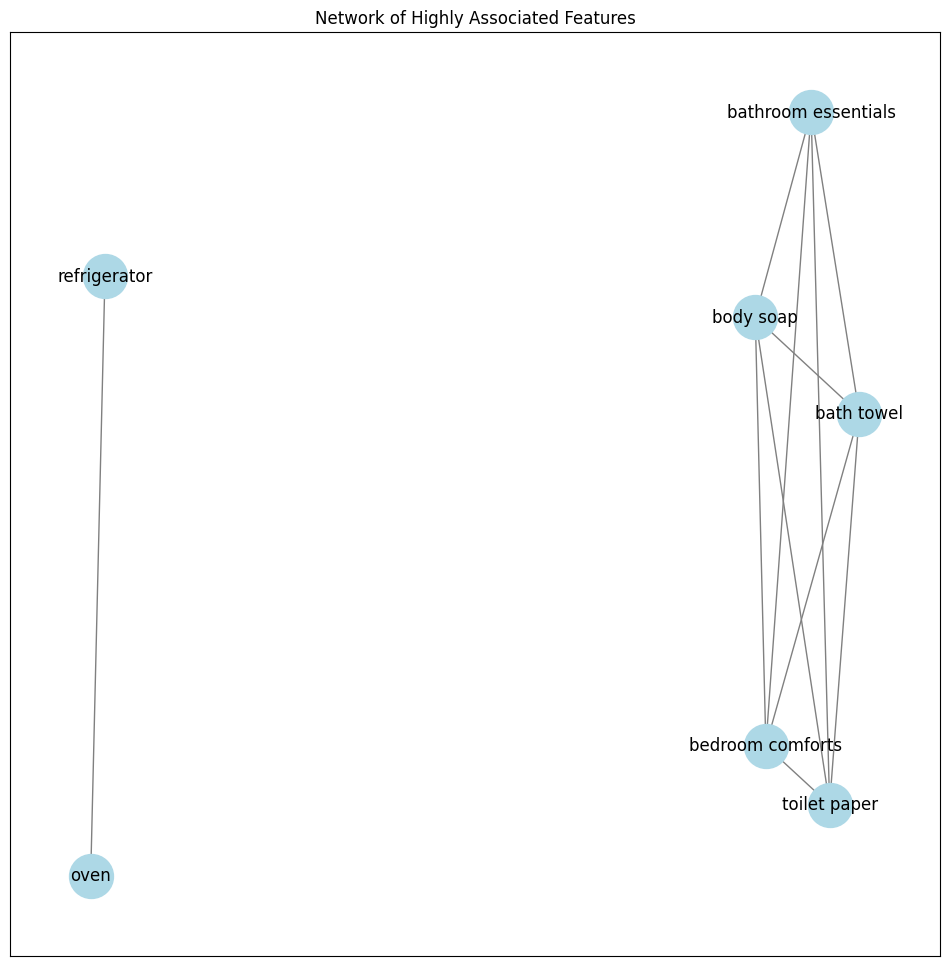

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.from_pandas_edgelist(highly_associated_pairs, 'Feature1', 'Feature2')

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=1000, edge_color='gray')
plt.title('Network of Highly Associated Features')
plt.show()


In [42]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Prob_Feature1_Given_Feature2', 'Prob_Feature2_Given_Feature1'])
# Calculate and store results
for index, row in chi2_p_values_amenities_df_significant.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']

    # Conditional probabilities calculation
    prob_feature1_given_feature2 = (amenities_df[feature1] & amenities_df[feature2]).sum() / amenities_df[feature2].sum() if amenities_df[feature2].sum() > 0 else 0
    prob_feature2_given_feature1 = (amenities_df[feature1] & amenities_df[feature2]).sum() / amenities_df[feature1].sum() if amenities_df[feature1].sum() > 0 else 0

    temp_df = pd.DataFrame({
        'Feature1': [feature1],
        'Feature2': [feature2],
        'Prob_Feature1_Given_Feature2': [prob_feature1_given_feature2],
        'Prob_Feature2_Given_Feature1': [prob_feature2_given_feature1]
    })

    # Use concat instead of append
    results_df = pd.concat([results_df, temp_df], ignore_index=True)
# Print or save the results DataFrame
print(results_df)

C:\Users\ggeor\AppData\Local\Temp\ipykernel_29868\3152053267.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


                       Feature1                                 Feature2  \
0           bathroom essentials                         bedroom comforts   
1                     body soap                             toilet paper   
2                    bath towel                                body soap   
3                    bath towel                             toilet paper   
4           bathroom essentials                                body soap   
...                         ...                                      ...   
11210  accessible height toilet                                breakfast   
11211          air conditioning                               dvd player   
11212                murphy bed                      table corner guards   
11213                 breakfast                           walk in shower   
11214        formal dining area  translation missing en hosting_amenity_   

       Prob_Feature1_Given_Feature2  Prob_Feature2_Given_Feature1  
0                  

In [43]:
# Filter the DataFrame for high conditional probabilities
high_dependency = results_df[(results_df['Prob_Feature1_Given_Feature2'] > 0.9) & (results_df['Prob_Feature2_Given_Feature1'] > 0.9)]
print(high_dependency)


                     Feature1                 Feature2  \
0         bathroom essentials         bedroom comforts   
1                   body soap             toilet paper   
2                  bath towel                body soap   
3                  bath towel             toilet paper   
4         bathroom essentials                body soap   
5         bathroom essentials             toilet paper   
6            bedroom comforts             toilet paper   
7            bedroom comforts                body soap   
8                  bath towel         bedroom comforts   
9                  bath towel      bathroom essentials   
10                       oven             refrigerator   
22                    parking                    piano   
156               dual vanity              video games   
157               dual vanity     shower bathtub combo   
158   stand alone rain shower    surround sound system   
159     surround sound system              video games   
160      showe

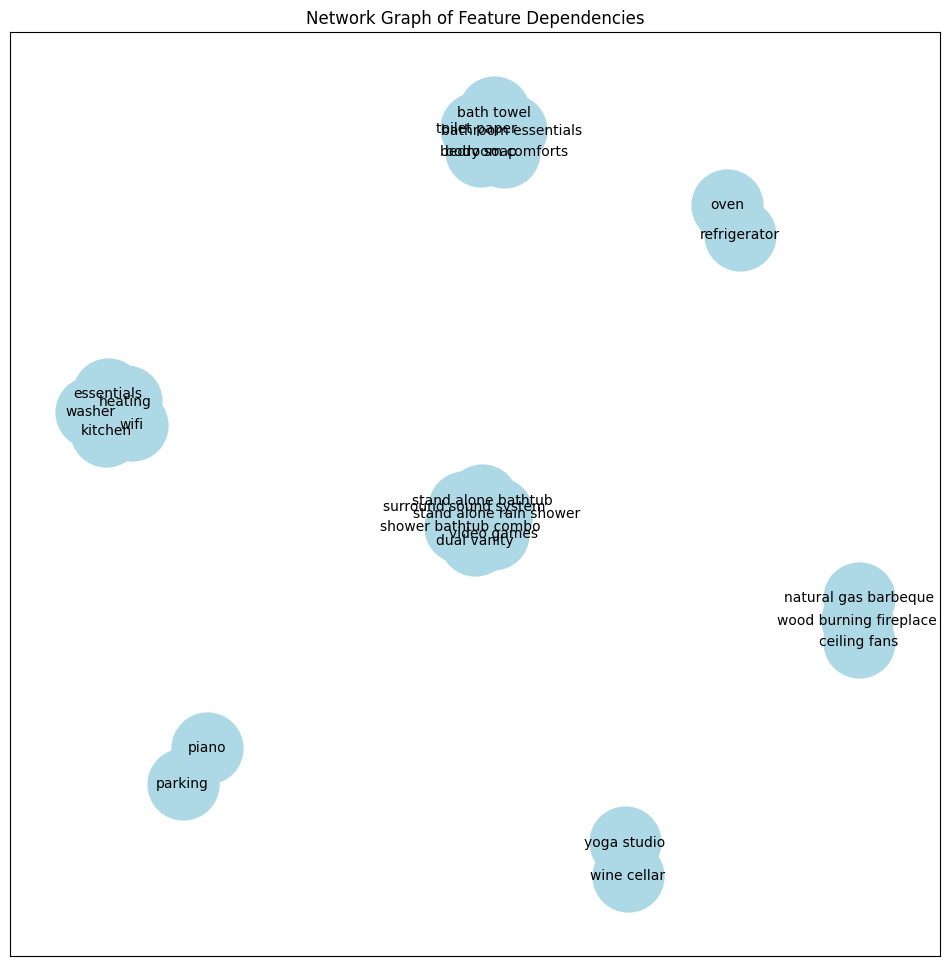

In [44]:
# Create a graph
G = nx.from_pandas_edgelist(high_dependency, 'Feature1', 'Feature2', ['Prob_Feature1_Given_Feature2'])

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # for consistent layout
nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=2500, edge_color='gray', linewidths=2, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(row['Feature1'], row['Feature2']): f"{row['Prob_Feature1_Given_Feature2']:.2f}" for index, row in high_dependency.iterrows()})
plt.title("Network Graph of Feature Dependencies")
plt.show()


Host_verifications

In [48]:
def calculate_significant_chi_squared(df, significance_level=0.05):
    results = []
    columns = df.columns
    
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            # Create contingency table
            table = pd.crosstab(df[columns[i]], df[columns[j]])
            
            # Perform Chi-squared test
            chi2, p, dof, expected = chi2_contingency(table)
            
            # Append results if p-value is significant
            if p < significance_level:
                results.append({
                    'Feature1': columns[i],
                    'Feature2': columns[j],
                    'Chi2': chi2,
                    'P_value': p,
                    'Degrees_of_Freedom': dof
                })
    
    # Convert list to DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort the DataFrame by Chi2 value in descending order
    results_df_sorted = results_df.sort_values(by='Chi2', ascending=False)
    
    return results_df_sorted


In [54]:
# Calculate significant Chi-squared values for host_verifications_df_subset
significant_results_host_verifications = calculate_significant_chi_squared(host_verifications_df)
print(significant_results_host_verifications)

                 Feature1               Feature2          Chi2   P_value  \
51        identity_manual                 selfie  43097.684037  0.000000   
94                 sesame         sesame_offline  36324.203056  0.000000   
35          government_id                  jumio  23008.370643  0.000000   
80  offline_government_id                 selfie  16956.501952  0.000000   
49        identity_manual  offline_government_id  15161.841765  0.000000   
..                    ...                    ...           ...       ...   
85                  phone                 selfie      5.384326  0.020318   
91                 selfie                sent_id      5.369640  0.020490   
19               facebook         manual_offline      4.631250  0.031395   
69         manual_offline                  phone      4.328885  0.037471   
12                  email                sent_id      4.175781  0.041006   

    Degrees_of_Freedom  
51                   1  
94                   1  
35          

In [55]:
impact_counts_host_ver = pd.concat([significant_results_host_verifications['Feature1'], significant_results_host_verifications['Feature2']]).value_counts()
print(impact_counts_host_ver)

offline_government_id    15
jumio                    15
reviews                  15
government_id            14
email                    14
selfie                   14
identity_manual          13
facebook                 13
work_email               12
manual_online            11
sent_id                  10
google                   10
phone                    10
manual_offline           10
kba                       8
zhima_selfie              4
sesame                    1
sesame_offline            1
Name: count, dtype: int64


In [56]:
highly_associated_pairs_host_ver = significant_results_host_verifications[significant_results_host_verifications['Chi2'] > 1000 ]

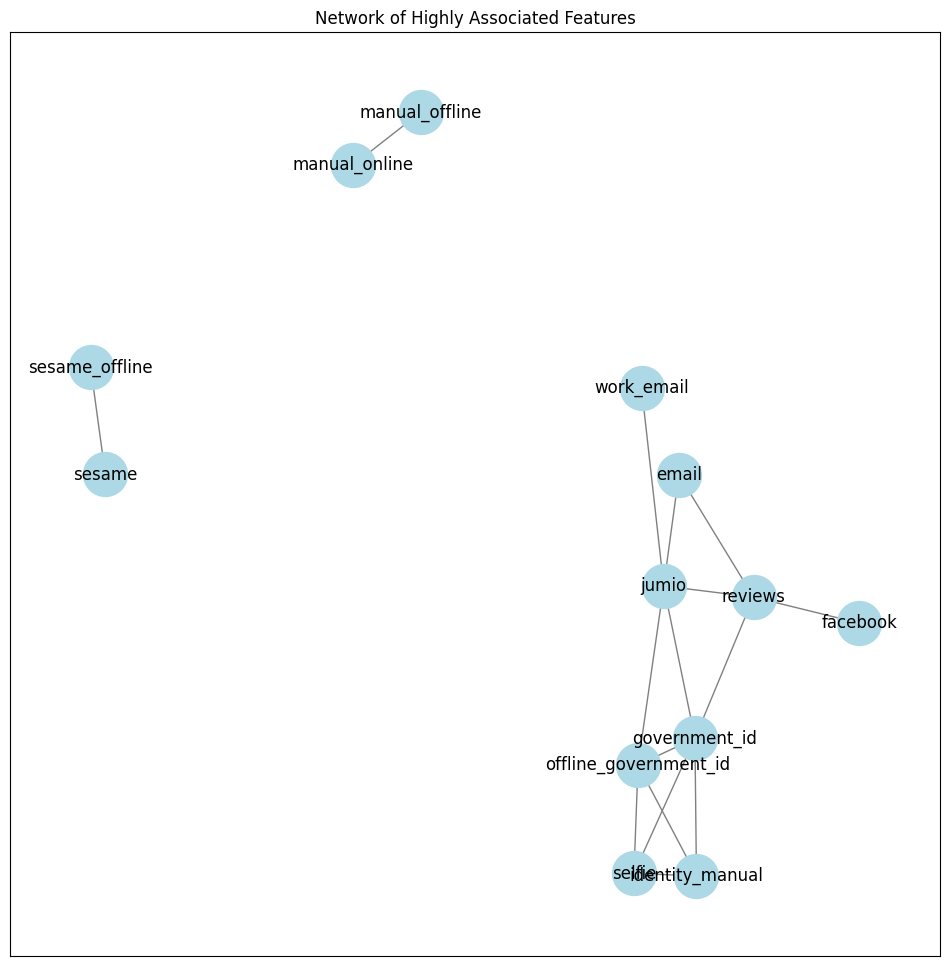

In [57]:
G = nx.from_pandas_edgelist(highly_associated_pairs_host_ver, 'Feature1', 'Feature2')

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # k regulates the distance between nodes
nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=1000, edge_color='gray')
plt.title('Network of Highly Associated Features')
plt.show()

In [59]:
def create_dependency_graph(amenities_df, chi2_significant_df, threshold=0.9):
    # Create an empty DataFrame to store results
    results_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Prob_Feature1_Given_Feature2', 'Prob_Feature2_Given_Feature1'])

    # Calculate and store results
    for index, row in chi2_significant_df.iterrows():
        feature1 = row['Feature1']
        feature2 = row['Feature2']

        # Conditional probabilities calculation
        prob_feature1_given_feature2 = (amenities_df[feature1] & amenities_df[feature2]).sum() / amenities_df[feature2].sum() if amenities_df[feature2].sum() > 0 else 0
        prob_feature2_given_feature1 = (amenities_df[feature1] & amenities_df[feature2]).sum() / amenities_df[feature1].sum() if amenities_df[feature1].sum() > 0 else 0

        temp_df = pd.DataFrame({
            'Feature1': [feature1],
            'Feature2': [feature2],
            'Prob_Feature1_Given_Feature2': [prob_feature1_given_feature2],
            'Prob_Feature2_Given_Feature1': [prob_feature2_given_feature1]
        })

        # Use concat instead of append
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

    # Filter for high dependencies
    high_dependency = results_df[(results_df['Prob_Feature1_Given_Feature2'] > threshold) & (results_df['Prob_Feature2_Given_Feature1'] > threshold)]

    # Create a graph
    G = nx.from_pandas_edgelist(high_dependency, 'Feature1', 'Feature2', ['Prob_Feature1_Given_Feature2'])

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # for consistent layout
    nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=2500, edge_color='gray', linewidths=2, font_size=10)
    plt.title("Network Graph of Feature Dependencies")
    plt.show()

    return results_df


C:\Users\ggeor\AppData\Local\Temp\ipykernel_29868\3025096179.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


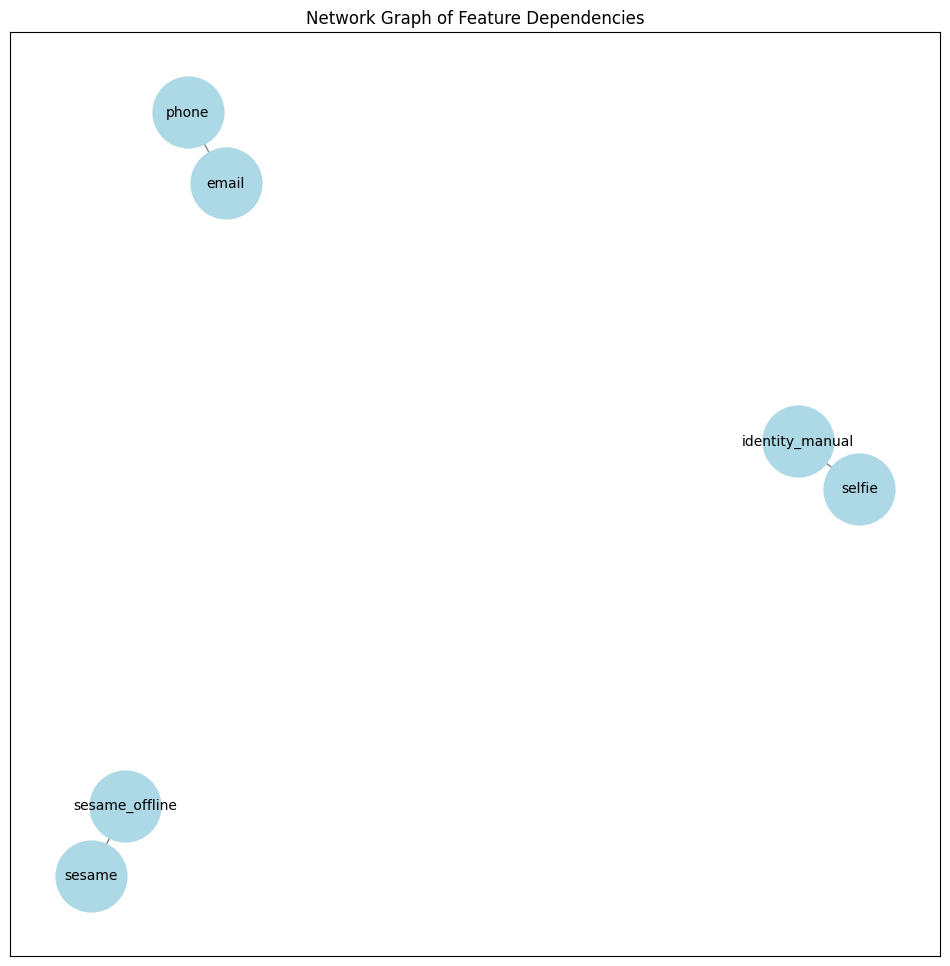

In [60]:
# Calculate the dependency graph for amenities_df_subset
dependency_results_amenities = create_dependency_graph(host_verifications_df, significant_results_host_verifications, threshold=0.9)

Feature Selection Techniques (Filter-Based)

In [90]:
# drop name and description and neighbourhood_overview columns from entire_home_copy
entire_home_copy = entire_home_copy.drop(columns=['name', 'description'])


In [100]:
# drop rows with na values in entire_home_copy
entire_home_copy = entire_home_copy.dropna()

In [101]:
print(entire_home_copy.isnull().sum().head(20))

mean_price                     0
host_listings_count            0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
reviews_per_month              0
distance_from_centre_in_km     0
#_listings_in_neighbourhood    0
accessible height bed          0
accessible height toilet       0
dtype: int64


2. Information Gain 

In [102]:
# information gain for numerical columns
from sklearn.feature_selection import mutual_info_regression

# target is mean_price
target = entire_home_copy['mean_price']

# drop mean_price
entire_home_copy_cleaned_without_target = entire_home_copy.drop(columns=['mean_price'])

# calculate the mutual information between each feature and the target
mutual_info = pd.Series(mutual_info_regression(entire_home_copy_cleaned_without_target, target, discrete_features=False), index=entire_home_copy_cleaned_without_target.columns)

# sort the mutual_info values in descending order
mutual_info = mutual_info.sort_values(ascending=False)

print(mutual_info)

host_listings_count     0.287508
accommodates            0.219986
bedrooms                0.209521
bathrooms               0.187714
beds                    0.164465
                          ...   
dishwasher              0.000000
projector and screen    0.000000
rain shower             0.000000
satellite tv            0.000000
oven                    0.000000
Length: 297, dtype: float64


In [103]:
# drop columns with mutual_info < 0.001
entire_home_copy_selected_info_gain = entire_home_copy.drop(columns=mutual_info[mutual_info < 0.001].index)

# print entire_home_copy_selected_info_gain
print(entire_home_copy_selected_info_gain)

       mean_price  host_listings_count  latitude  longitude  accommodates  \
0       90.000000                  3.0  51.46225   -0.11732             4   
1       75.000000                  1.0  51.48796   -0.16898             2   
2      312.966418                 18.0  51.52098   -0.14002             6   
3       66.417910                  1.0  51.44687   -0.21874             4   
4      195.000000                  1.0  51.47934   -0.28066             5   
...           ...                  ...       ...        ...           ...   
47387  125.000000                  1.0  51.50617   -0.22222             5   
47390  126.574468                  1.0  51.51758    0.02012             5   
47410  135.000000                  2.0  51.51592   -0.19220             8   
47415  135.373134                  0.0  51.51351   -0.28149             4   
47427   65.000000                  0.0  51.53222   -0.22549             2   

       bathrooms  bedrooms  beds  minimum_nights  availability_30  ...  \
0

Explore Numerical Features from entire home 

In [104]:
# numerical columns  from entire_home_copy
numerical_columns = entire_home_copy.select_dtypes(include=['float64', 'int64']).columns

In [105]:
import seaborn as sns

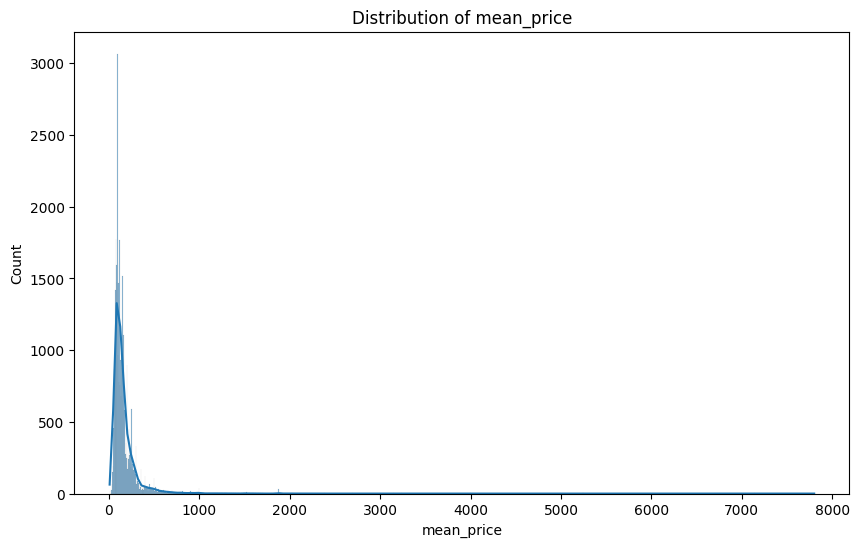

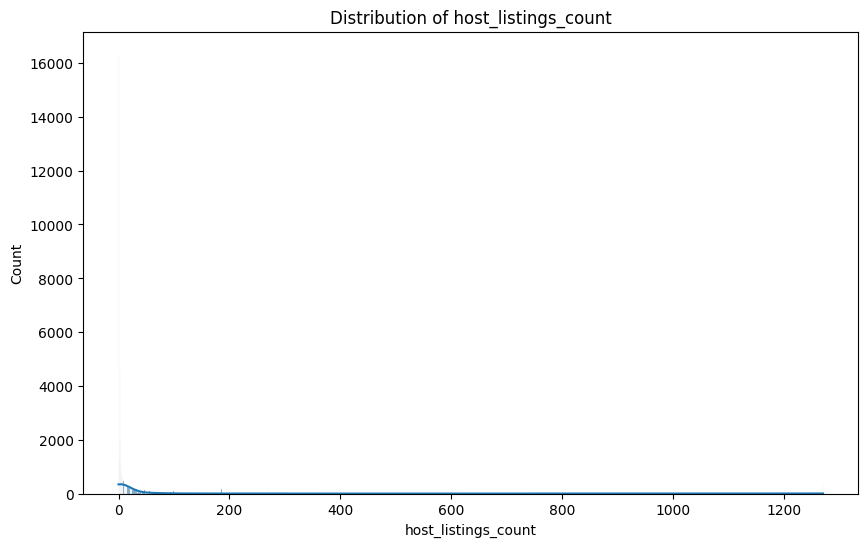

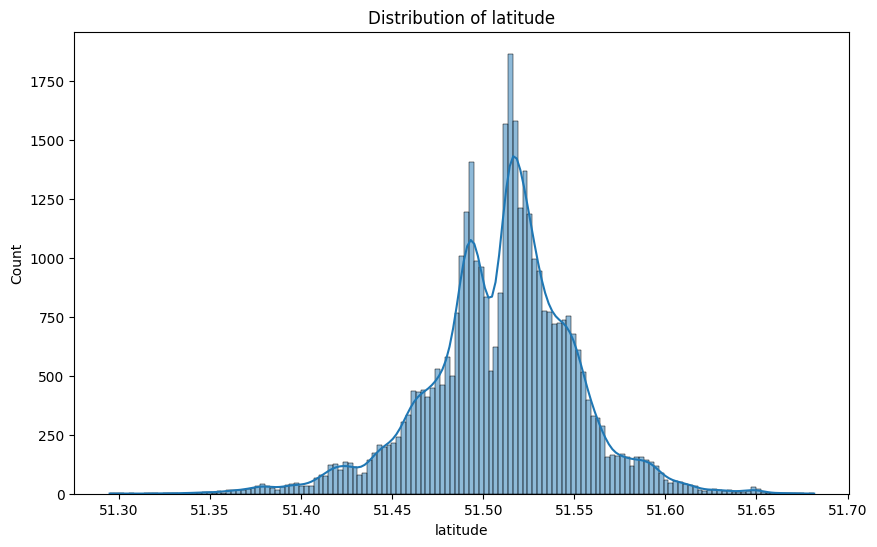

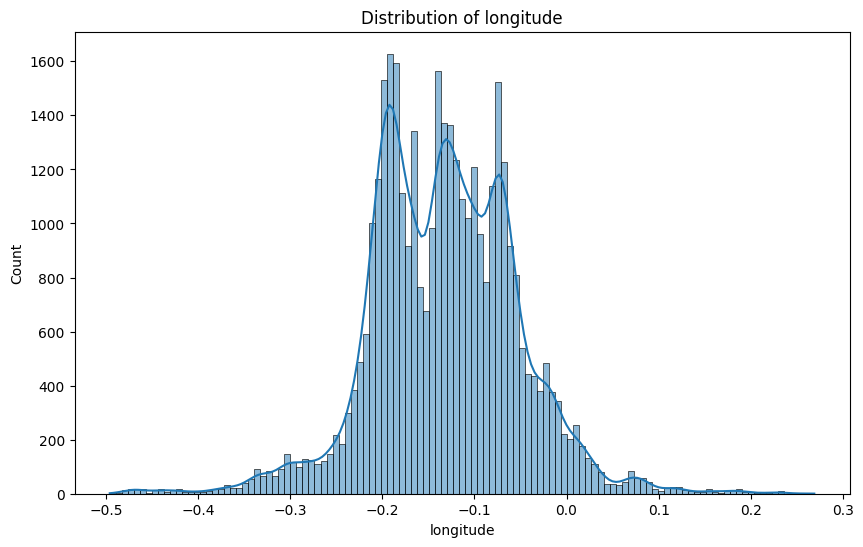

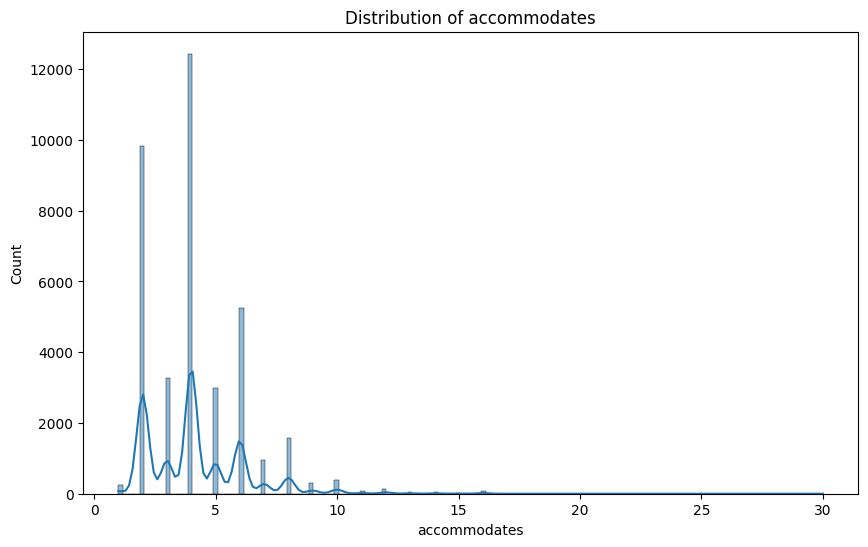

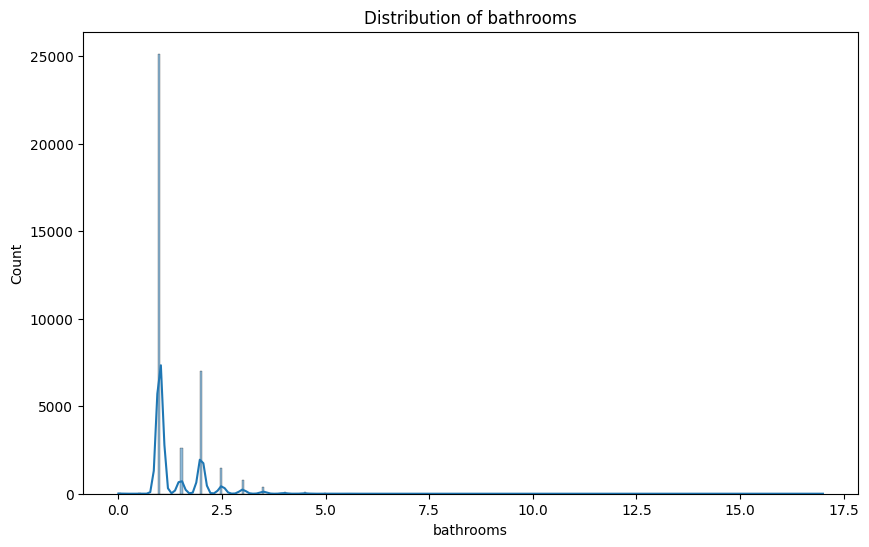

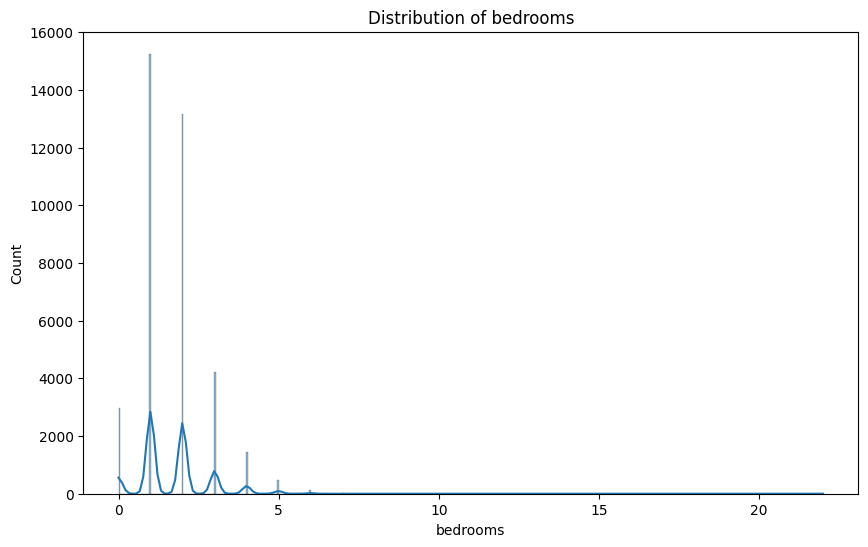

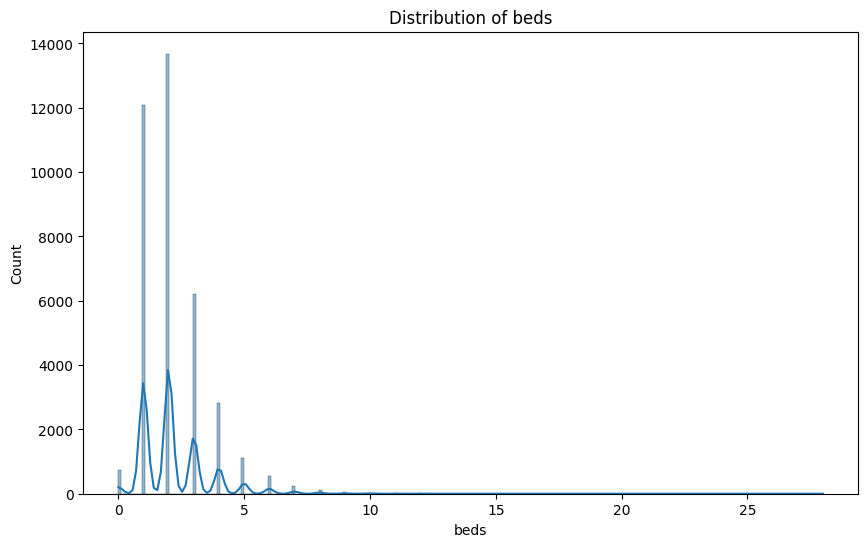

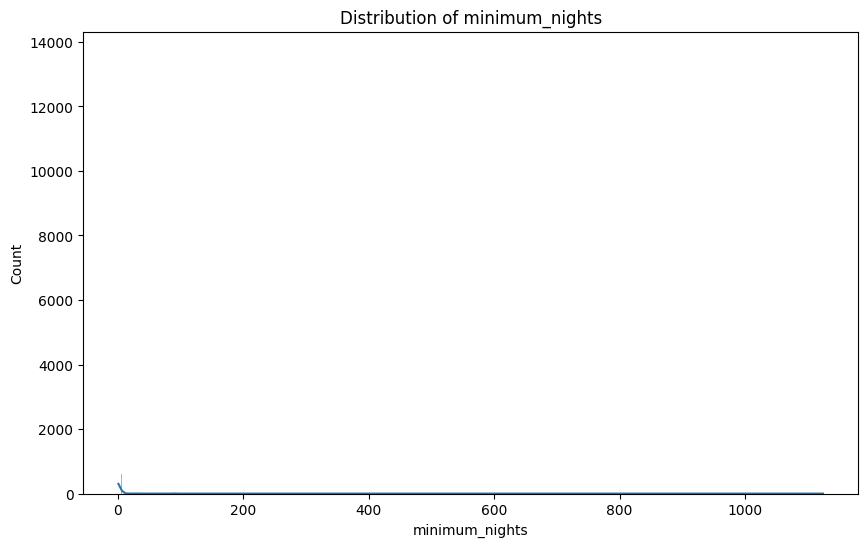

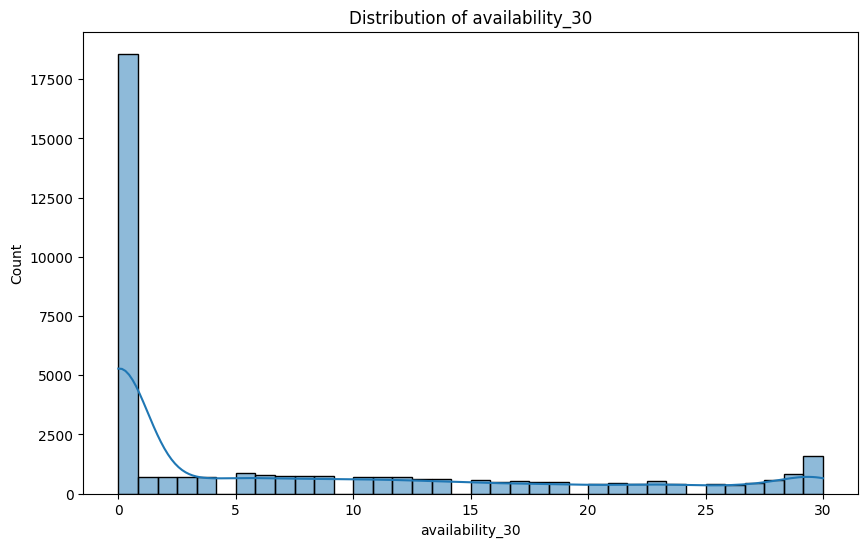

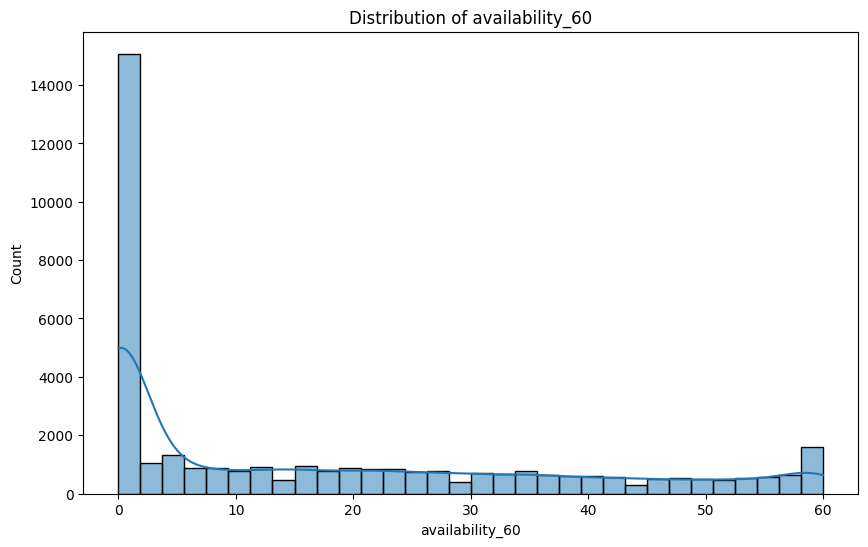

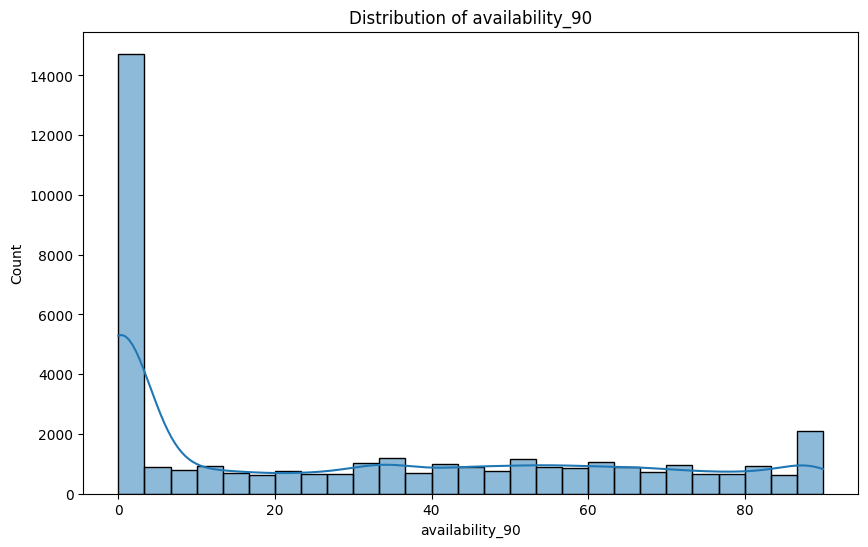

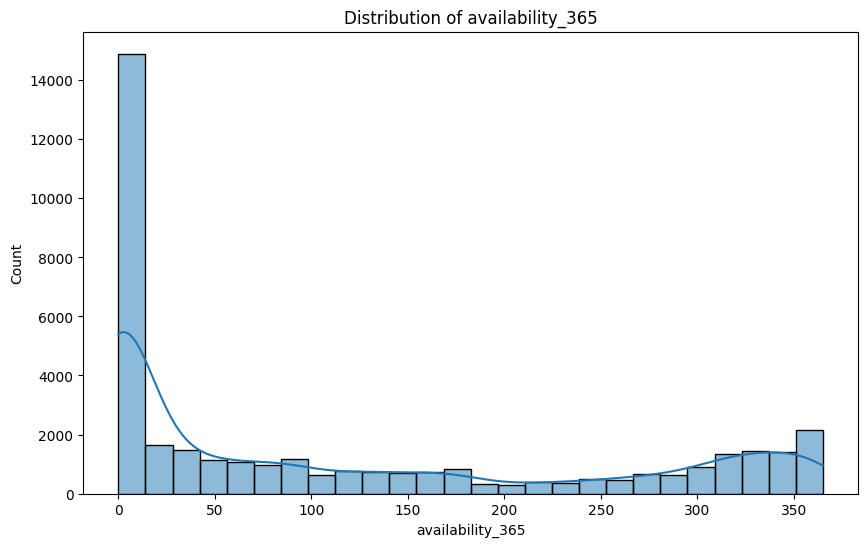

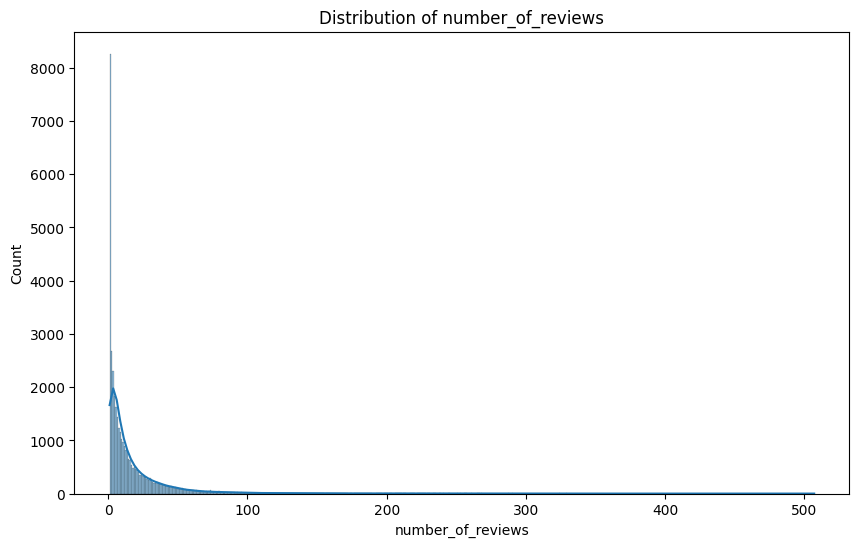

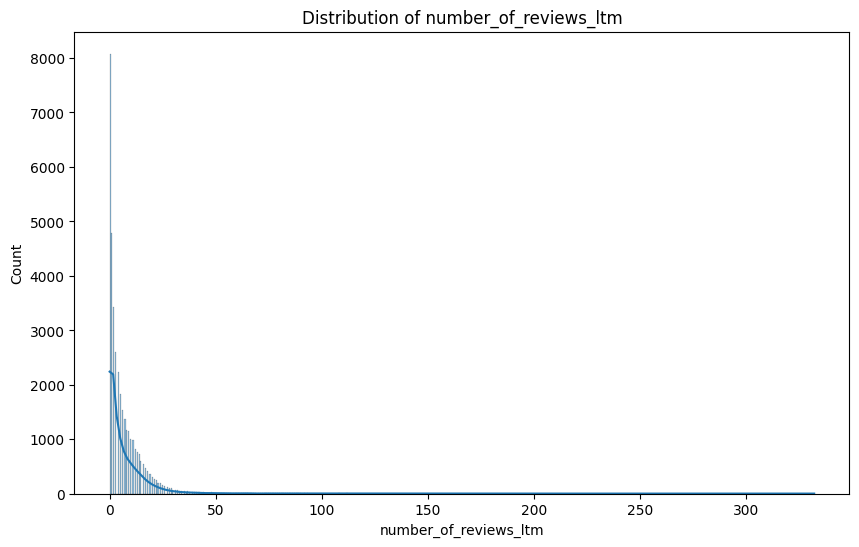

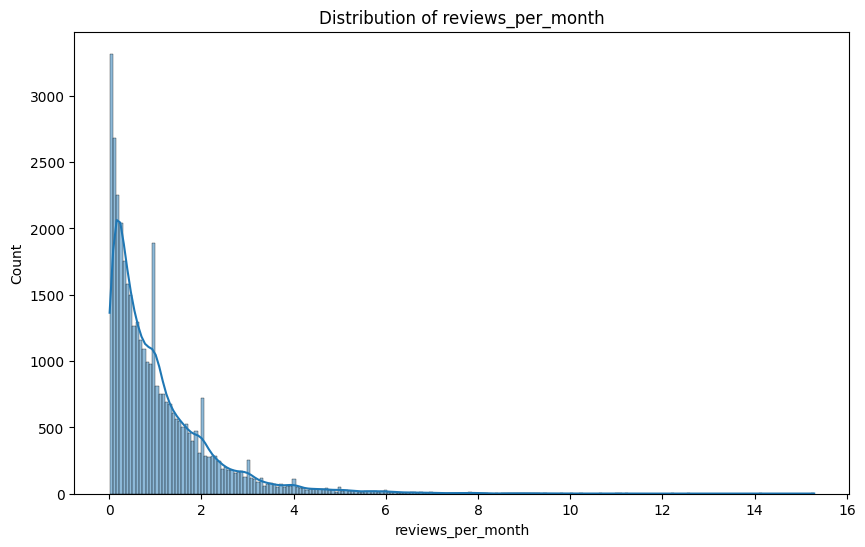

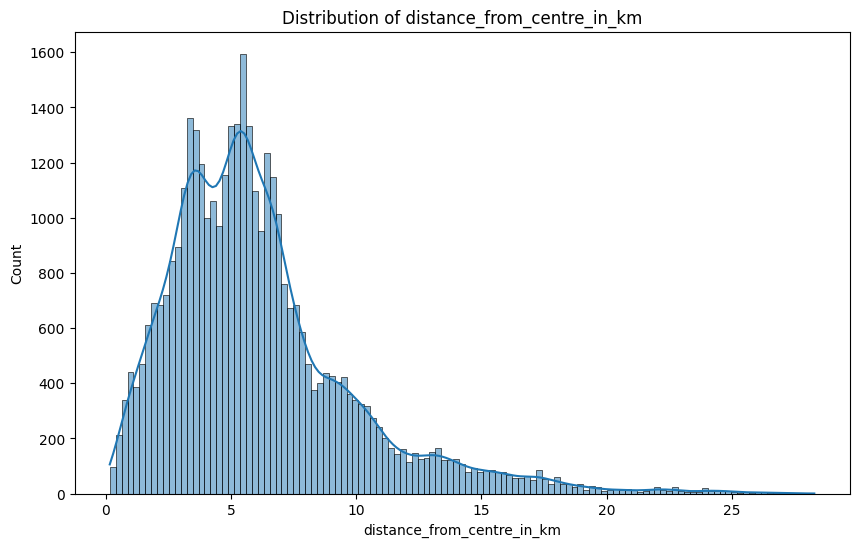

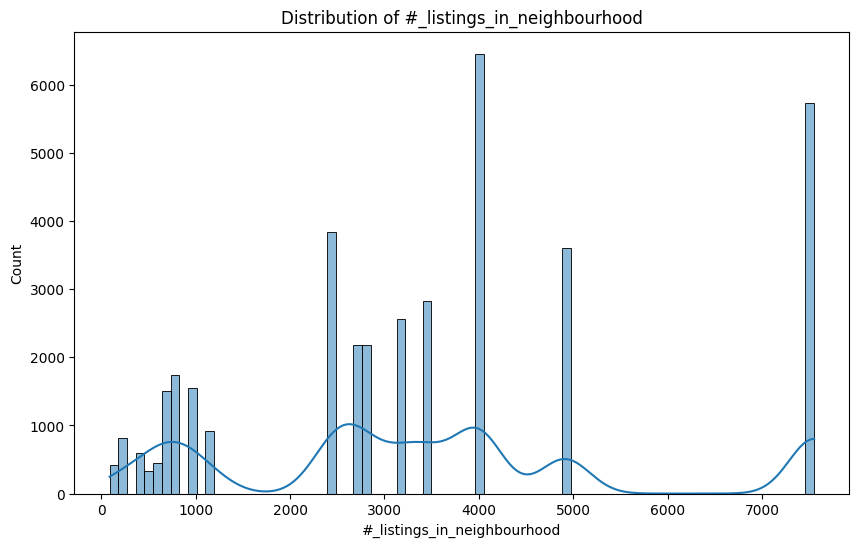

KeyError: 'accessible height bed'

<Figure size 1000x600 with 0 Axes>

In [107]:
# plot the distribution of numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(entire_home_copy_selected_info_gain[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

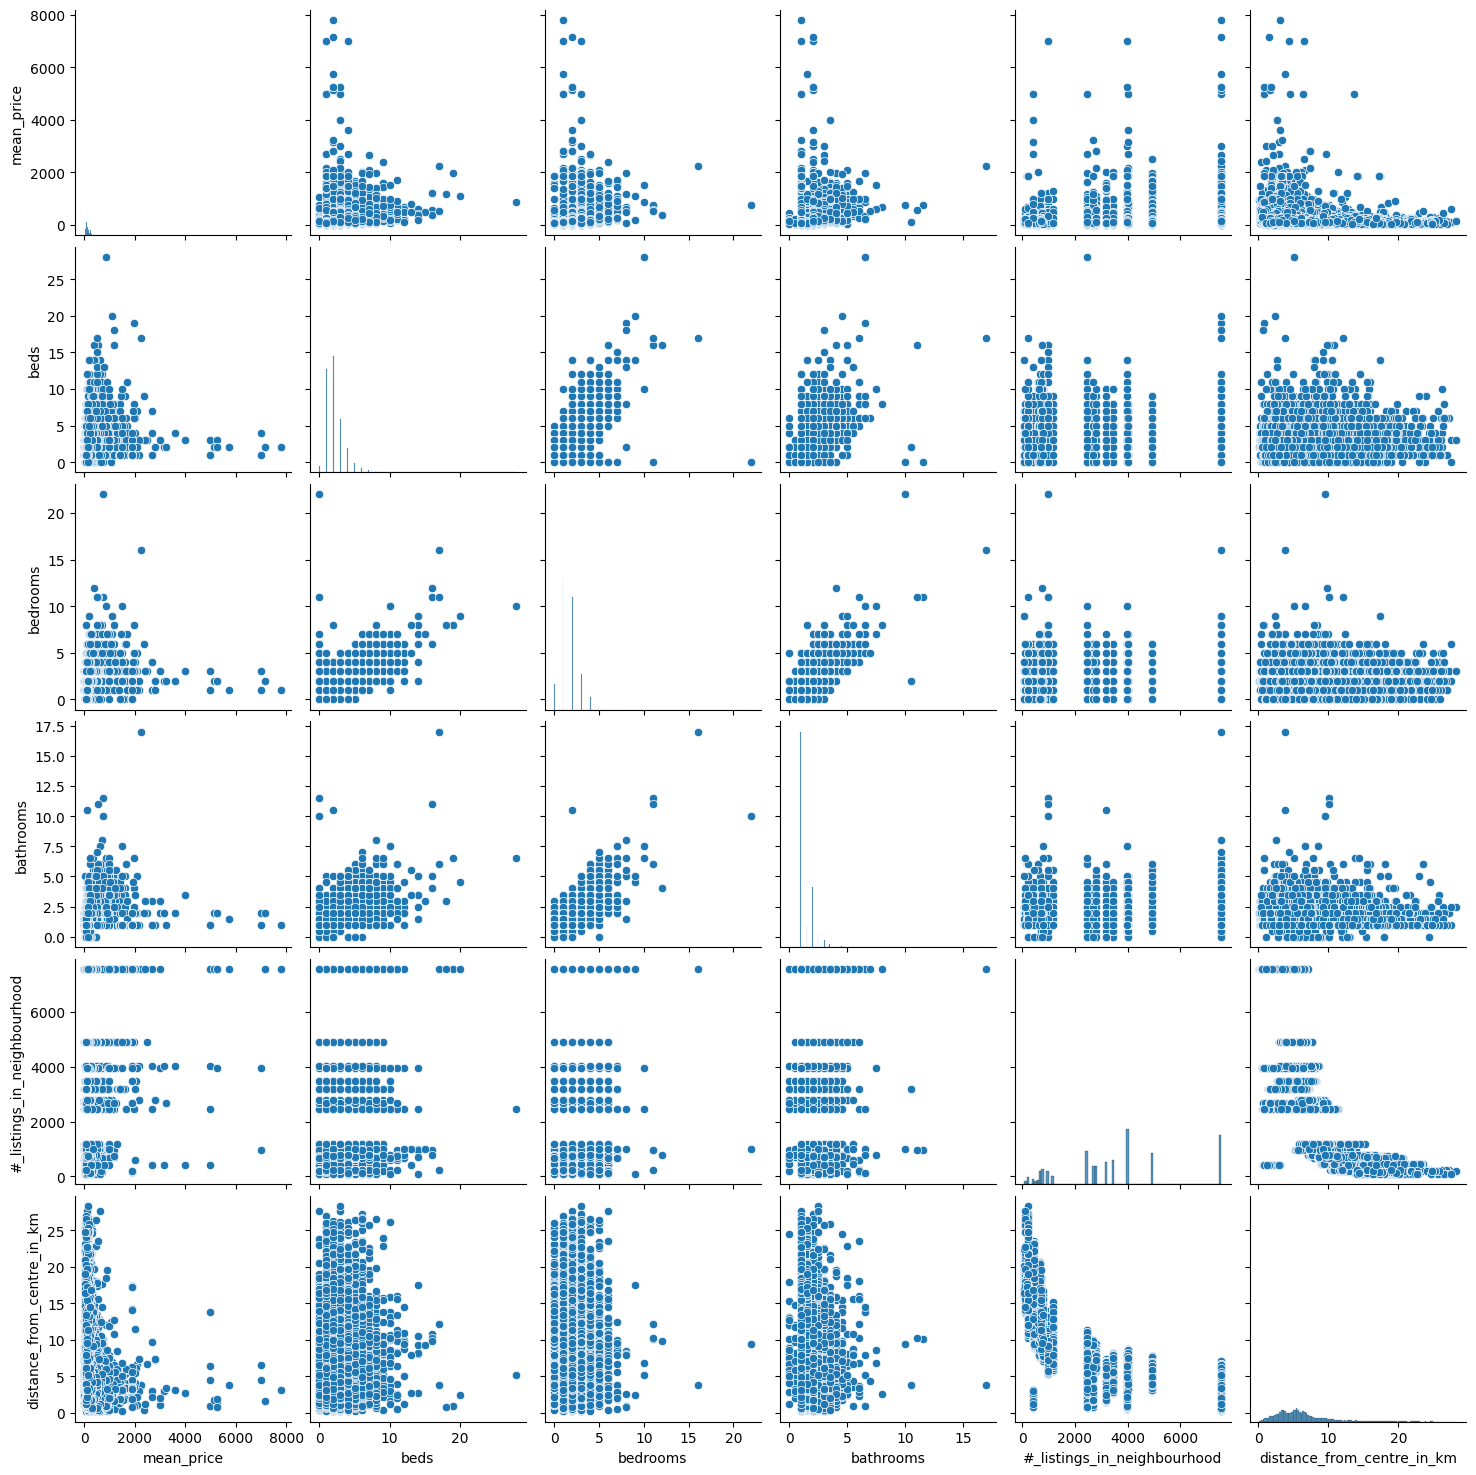

In [108]:
# columns price , beds, bedrooms, bathrooms, #_listings_in_neighbourhood, distance_from_centre_in_km in a list
columns_for_pairplot = ['mean_price', 'beds', 'bedrooms', 'bathrooms', '#_listings_in_neighbourhood', 'distance_from_centre_in_km']

# pairplot of the columns in columns_for_pairplot
sns.pairplot(entire_home_copy[columns_for_pairplot])
plt.show()


In [ ]:
# vif for numerical numerical columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant to the model
df_with_const = add_constant(numerical_columns)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, var) for var in range(df_with_const.shape[1])]

print(vif)

                       Variable           VIF
0                         const  1.831589e+06
1                    mean_price  1.292732e+00
2            host_response_rate  1.034926e+00
3           host_listings_count  1.076913e+00
4                      latitude  1.035106e+00
5                     longitude  1.156767e+00
6                  accommodates  3.968644e+00
7                     bathrooms  2.000895e+00
8                      bedrooms  3.805451e+00
9                          beds  3.293234e+00
10               minimum_nights  1.013550e+00
11             availability_365  1.108729e+00
12            number_of_reviews  1.839834e+00
13        number_of_reviews_ltm  2.640279e+00
14         review_scores_rating  4.718700e+00
15       review_scores_accuracy  3.234450e+00
16    review_scores_cleanliness  2.574372e+00
17        review_scores_checkin  2.258267e+00
18  review_scores_communication  2.657307e+00
19       review_scores_location  1.592373e+00
20          review_scores_value  3

In [ ]:
# tranform mean_price to log
entire_home_copy['mean_price'] = np.log(entire_home_copy['mean_price'])

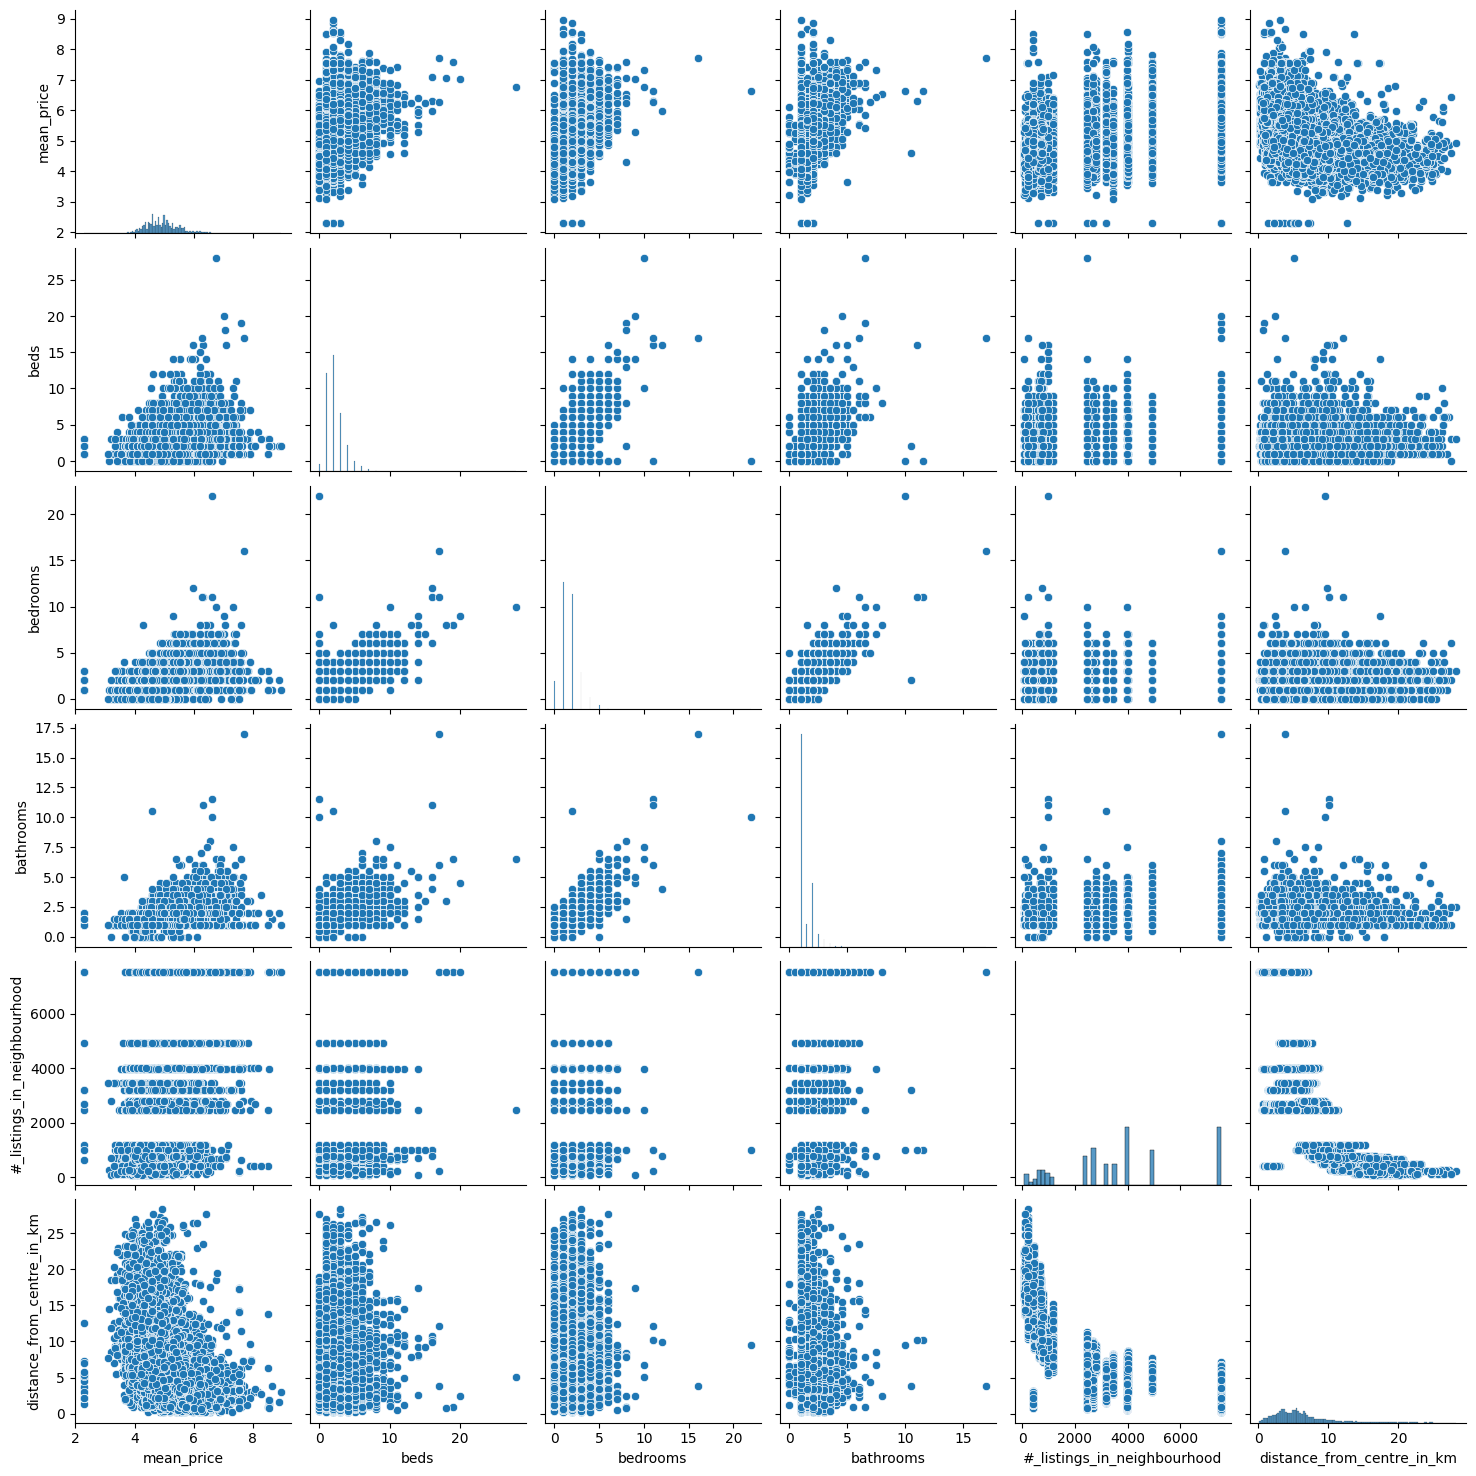

In [ ]:
# pairplot of the columns in columns_for_pairplot
# columns price , beds, bedrooms, bathrooms, #_listings_in_neighbourhood, distance_from_centre_in_km in a list
columns_for_pairplot = ['mean_price', 'beds', 'bedrooms', 'bathrooms', '#_listings_in_neighbourhood', 'distance_from_centre_in_km']

# pairplot of the columns in columns_for_pairplot
sns.pairplot(entire_home_copy[columns_for_pairplot])
plt.show()

In [ ]:
# pearson r for numerical columns
for column in numerical_columns.columns:
    print('Pearson r for', column)
    print(column, entire_home_copy[column].corr(entire_home_copy['mean_price']))
    
# spearman r for numerical columns
for column in numerical_columns.columns:
    print('Spearmeans r for', column)
    print(column, entire_home_copy[column].corr(entire_home_copy['mean_price'], method='spearman'))
    
# kendall tau for numerical columns
for column in numerical_columns.columns:
    print('Kendall tau for', column)
    print(column, entire_home_copy[column].corr(entire_home_copy['mean_price'], method='kendall'))
    

Pearson r for mean_price
mean_price 1.0
Pearson r for host_response_rate
host_response_rate 0.03193967074979612
Pearson r for host_listings_count
host_listings_count 0.16833384652693387
Pearson r for latitude
latitude -0.03331986896181205
Pearson r for longitude
longitude -0.10988375513595747
Pearson r for accommodates
accommodates 0.5039483435258628
Pearson r for bathrooms
bathrooms 0.525493872460545
Pearson r for bedrooms
bedrooms 0.5170182592220436
Pearson r for beds
beds 0.4283108191595967
Pearson r for minimum_nights
minimum_nights -0.01875611667224497
Pearson r for availability_365
availability_365 0.23312730833639758
Pearson r for number_of_reviews
number_of_reviews -0.07221631225457827
Pearson r for number_of_reviews_ltm
number_of_reviews_ltm -0.07048043369693358
Pearson r for review_scores_rating
review_scores_rating -0.00023473654947975787
Pearson r for review_scores_accuracy
review_scores_accuracy -0.039629457541534
Pearson r for review_scores_cleanliness
review_scores_clean

In [109]:
# copy entire_home_copy
entire_home_copy2 = entire_home.copy()

In [112]:
# keep 'id', 'name', 'description', 'neighborhood_overview', 'host_response_time','host_listings_count', 'host_verifications', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates','bathrooms', 'bedrooms''beds', 'amenities', 'price', 'minimum_nights','instant_bookable', 'cancellation_policy', 'distance_from_centre_in_km', '#_listings_in_neighbourhood', 'mean_price' in entire_home_copy2
columns_to_keep = ['name', 'description', 'host_response_time','host_listings_count', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'accommodates','bathrooms', 'bedrooms','beds', 'minimum_nights','instant_bookable', 'distance_from_centre_in_km', '#_listings_in_neighbourhood', 'mean_price']

entire_home_copy2 = entire_home_copy2[columns_to_keep]

In [114]:
# drop na values from entire_home_copy2
entire_home_copy2 = entire_home_copy2.dropna()

In [113]:
print(entire_home_copy2)

                                                   name  \
0            Arty and Bright London Apartment in Zone 2   
1                   Bright Chelsea  Apartment. Chelsea!   
2                 Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3         All-comforts 2-bed flat near Wimbledon tennis   
4                   Kew Gardens 3BR house in cul-de-sac   
...                                                 ...   
48514        Stylish 1 bed flat in Seven Sisters London   
48515  3 Bedroom 3 Floor Apartment 5 min to Kings Cross   
48516        Maida Vale lovely 3BR apartment w/ terrace   
48517  ★ Charming 1Bed Apt  - 5mins from Burgess Park ★   
48518                                     Fabulous flat   

                                             description host_response_time  \
0      Unlike most rental apartments out there my fla...     within an hour   
1      Lots of windows and light.  St Luke's Gardens ...                NaN   
2      You'll have a wonderful stay in this superb mo.

In [115]:
# transform mean price to original from log
import numpy as np
entire_home_copy2['mean_price'] = np.exp(entire_home_copy2['mean_price'])

C:\Users\ggeor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [116]:
# percentage of presence of amenities in the listings in amazing_df_no_na
percentage_presence = amenities_df.sum() / amenities_df.shape[0]

# sort the percentage_presence in descending order
percentage_presence = percentage_presence.sort_values(ascending=False)

In [117]:
print(len(percentage_presence[percentage_presence > 0.1]))

45


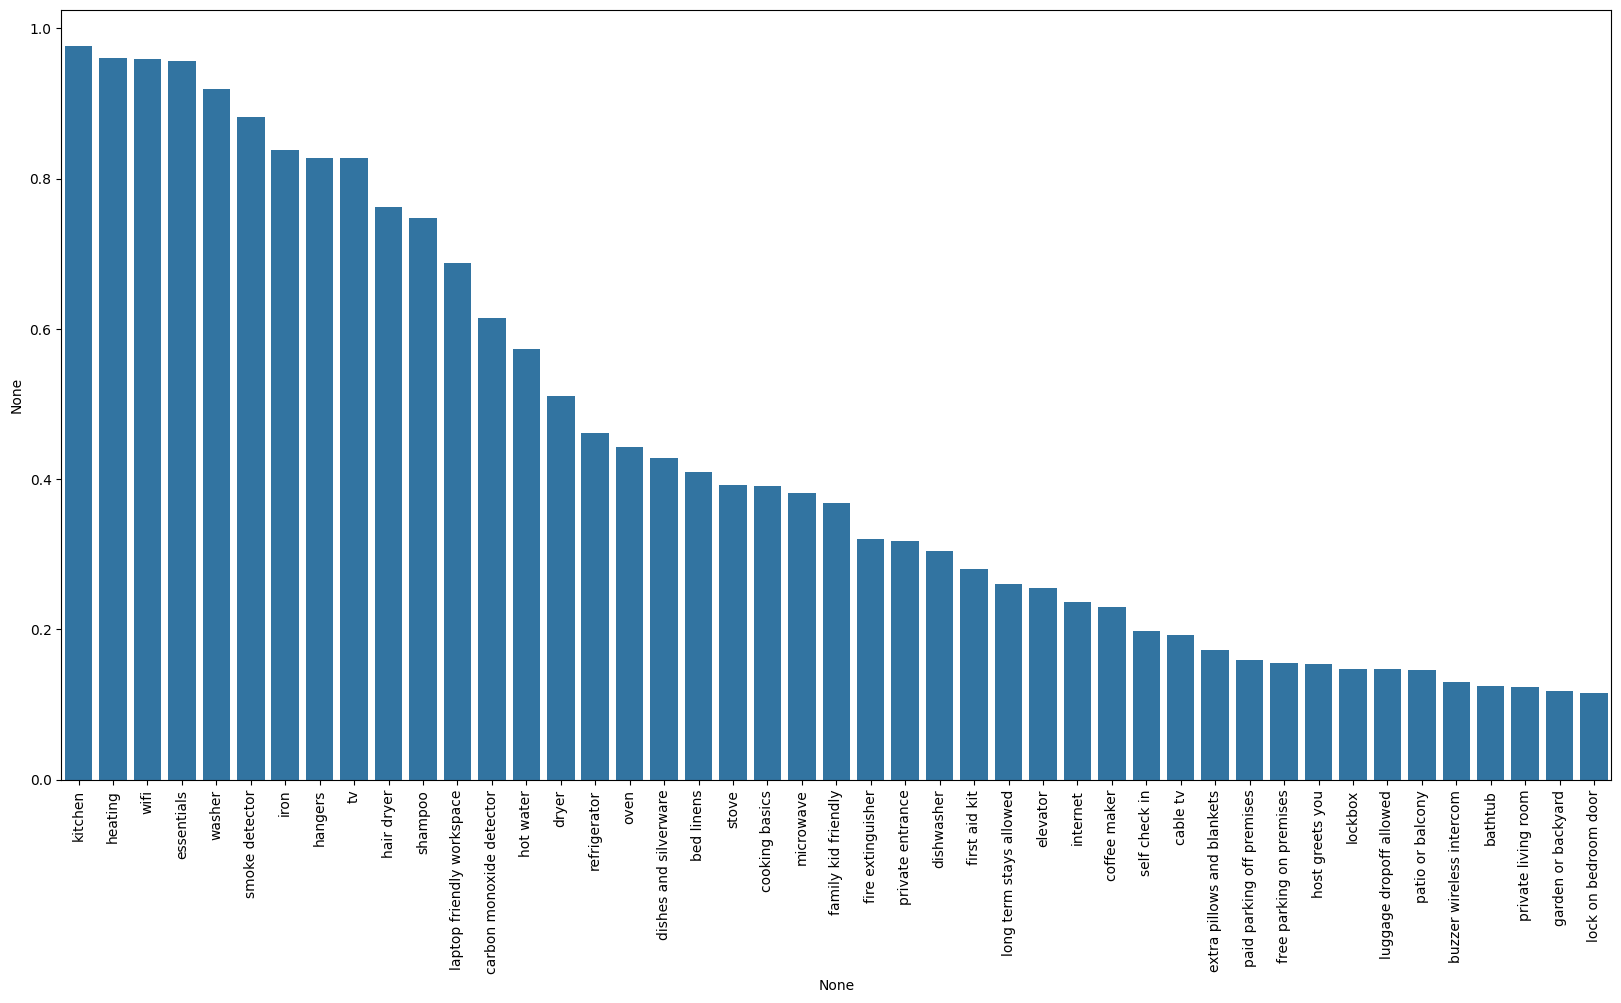

In [118]:
# plot the percentage_presence of listings with over 10% presence of amenities in the listings in ammenities_df_no_na and plot the price in a binary plot with the mean_price
plt.figure(figsize=(20,10))
sns.barplot(x=percentage_presence[percentage_presence > 0.1].index, y=percentage_presence[percentage_presence > 0.1])
plt.xticks(rotation=90)
plt.show()


In [120]:
# print the colums in amenities_df_no_na with 1 value
print(amentities_df.columns[amentities_df.sum() == 1])

Index(['ceiling fans', 'ceiling hoist', 'dual vanity', 'gas fireplace',
       'lounge area', 'natural gas barbeque', 'propane barbeque', 'rooftop',
       'shared hot tub', 'shower bathtub combo', 'ski in ski out',
       'stand alone bathtub', 'stand alone rain shower',
       'surround sound system', 'touchless faucets', 'video games',
       'wine cellar', 'wood burning fireplace', 'yoga studio'],
      dtype='object')


In [119]:
print(amentities_df.columns[amentities_df.sum() < 10])

Index(['air purifier', 'alfresco bathtub', 'apple tv', 'beach view',
       'breakfast bar', 'ceiling fans', 'ceiling hoist', 'charcoal barbeque',
       'dining table', 'dual vanity', 'fax machine', 'fire pit', 'garden',
       'gas fireplace', 'ground floor access', 'hammock', 'hbo go',
       'heat lamps', 'ice machine', 'jetted tub', 'lounge area', 'media room',
       'mobile hoist', 'mountain view', 'mudroom', 'natural gas barbeque',
       'nespresso machine', 'office', 'outdoor kitchen', 'parking', 'piano',
       'private bathroom', 'private hot tub', 'projector and screen',
       'propane barbeque', 'rooftop', 'satellite tv', 'sauna',
       'security system', 'shared gym', 'shared hot tub', 'shared pool',
       'shower bathtub combo', 'ski in ski out', 'sonos sound system',
       'stand alone bathtub', 'stand alone rain shower',
       'stand alone steam shower', 'standing valet', 'surround sound system',
       'tennis court', 'touchless faucets', 'video games', 'wet bar

Conlinear Variables Handling using VIF and Correlation

In [125]:
# vif for entire_home_copy2_selected
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [143]:
# from numerical_columns drop columns if unique values equal to 2
def drop_binary_columns(df):
    # Filter numerical columns
    numerical_columns = df.select_dtypes(include=[np.number])
    
    # Drop columns that have exactly 2 unique values
    columns_to_drop = [col for col in numerical_columns.columns if numerical_columns[col].nunique() == 2]
    
    columns_to_drop = [col for col in numerical_columns.columns if numerical_columns[col].nunique() == 0]
    
    # Drop the columns from the DataFrame
    df = df.drop(columns=columns_to_drop)
    
    return df

# apply to numerical_columns
entire_home_copy2_selected = drop_binary_columns(entire_home_copy)


In [144]:
print(entire_home_copy2_selected)

       mean_price  host_listings_count  latitude  longitude  accommodates  \
0       90.000000                  3.0  51.46225   -0.11732             4   
1       75.000000                  1.0  51.48796   -0.16898             2   
2      312.966418                 18.0  51.52098   -0.14002             6   
3       66.417910                  1.0  51.44687   -0.21874             4   
4      195.000000                  1.0  51.47934   -0.28066             5   
...           ...                  ...       ...        ...           ...   
47387  125.000000                  1.0  51.50617   -0.22222             5   
47390  126.574468                  1.0  51.51758    0.02012             5   
47410  135.000000                  2.0  51.51592   -0.19220             8   
47415  135.373134                  0.0  51.51351   -0.28149             4   
47427   65.000000                  0.0  51.53222   -0.22549             2   

       bathrooms  bedrooms  beds  minimum_nights  availability_30  ...  \
0

In [145]:
# if columns has True or False drop the column from entire_home_copy2_selected
def drop_boolean_columns(df):
    # Filter numerical columns
    numerical_columns = df.select_dtypes(include=[np.number])
    
    # Drop columns that have exactly 2 unique values
    columns_to_drop = [col for col in numerical_columns.columns if numerical_columns[col].nunique() == 2]
    
    # Drop the columns from the DataFrame
    df = df.drop(columns=columns_to_drop)
    
    return df

# apply to entire_home_copy2_selected
entire_home_copy2_selected = drop_boolean_columns(entire_home_copy2_selected)

In [148]:
def drop_bool_columns(df):
    # Drop columns where the type is boolean
    df = df.drop(columns=[col for col in df.columns if df[col].dtype == 'bool'])
    
    return df

# apply to entire_home_copy2_selected
entire_home_copy2_selected = drop_bool_columns(entire_home_copy2_selected)

In [151]:
# if columns has one unique value drop the column from entire_home_copy2_selected
def drop_single_value_columns(df):
    # Drop columns with only one unique value
    df = df.drop(columns=[col for col in df.columns if df[col].nunique() == 1])
    
    return df

# apply to entire_home_copy2_selected
entire_home_copy2_selected = drop_single_value_columns(entire_home_copy2_selected)

In [152]:
print(entire_home_copy2_selected)

       mean_price  host_listings_count  latitude  longitude  accommodates  \
0       90.000000                  3.0  51.46225   -0.11732             4   
1       75.000000                  1.0  51.48796   -0.16898             2   
2      312.966418                 18.0  51.52098   -0.14002             6   
3       66.417910                  1.0  51.44687   -0.21874             4   
4      195.000000                  1.0  51.47934   -0.28066             5   
...           ...                  ...       ...        ...           ...   
47387  125.000000                  1.0  51.50617   -0.22222             5   
47390  126.574468                  1.0  51.51758    0.02012             5   
47410  135.000000                  2.0  51.51592   -0.19220             8   
47415  135.373134                  0.0  51.51351   -0.28149             4   
47427   65.000000                  0.0  51.53222   -0.22549             2   

       bathrooms  bedrooms  beds  minimum_nights  availability_30  \
0     

In [153]:
# Add a constant to the model
df_with_const_no_na = add_constant(entire_home_copy2_selected)

df_with_const_no_na = df_with_const_no_na.astype(float)

# Calculate VIF for each predictor
vif_no_na = pd.DataFrame()
vif_no_na["Variable"] = df_with_const_no_na.columns
vif_no_na["VIF"] = [variance_inflation_factor(df_with_const_no_na.values, i) for i in range(df_with_const_no_na.shape[1])]
print(vif_no_na)

                       Variable           VIF
0                         const  1.683677e+06
1                    mean_price  1.283617e+00
2           host_listings_count  1.034462e+00
3                      latitude  1.041069e+00
4                     longitude  1.148512e+00
5                  accommodates  4.009090e+00
6                     bathrooms  1.943593e+00
7                      bedrooms  3.765344e+00
8                          beds  3.367246e+00
9                minimum_nights  1.011581e+00
10              availability_30  8.870994e+00
11              availability_60  2.389439e+01
12              availability_90  1.591707e+01
13             availability_365  2.478256e+00
14            number_of_reviews  1.811212e+00
15        number_of_reviews_ltm  2.704410e+00
16            reviews_per_month  1.936268e+00
17   distance_from_centre_in_km  1.911110e+00
18  #_listings_in_neighbourhood  1.889709e+00


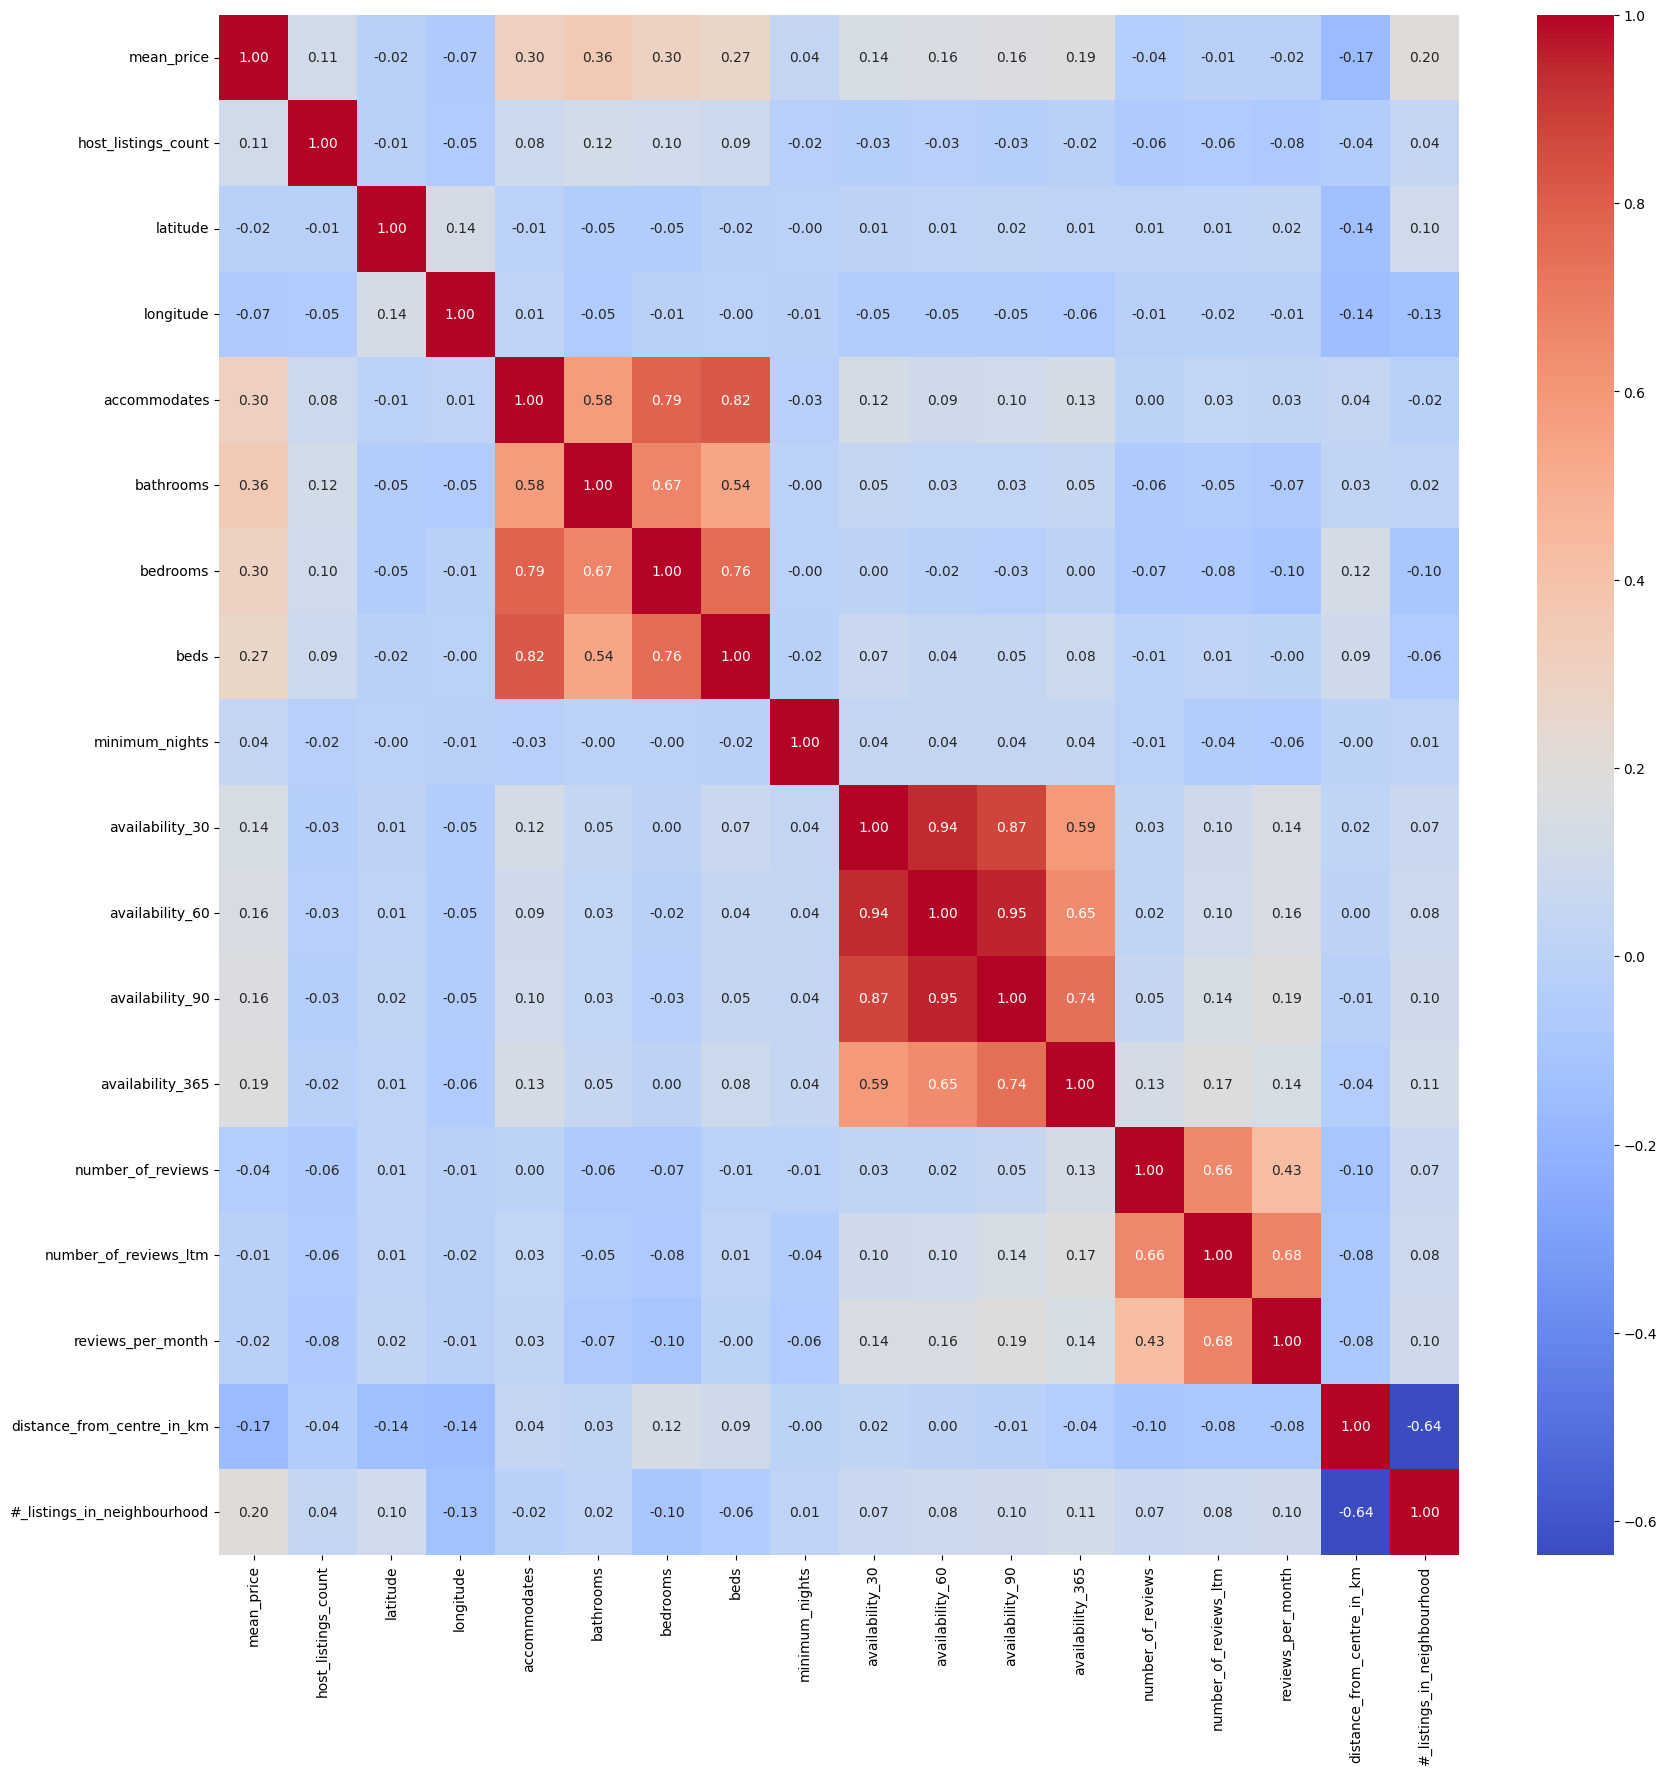

In [158]:
# correlation matrix for entire_home_copy2_selected
correlation_matrix = entire_home_copy2_selected.corr()

# plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
